### Problem Statement: 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

In [2]:
# Importing the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Importing PCA module
from sklearn.decomposition import PCA

# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Importing Classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score

# Importing other packages
from datetime import date, datetime
import multiprocessing
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
## Reading the data
telecom_churn = pd.read_csv("telecom_churn_data.csv")
# # looking at initial rows of the data
telecom_churn.head(5) 

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom_churn.shape

(99999, 226)

In [5]:
# For feature type
telecom_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
# For Data Statistics
telecom_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Creating column name list by the type of columns
id_cols= ['mobile_number','circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols =[column for column in telecom_churn.columns if column not in id_cols+date_cols+cat_cols]

In [8]:
# Checking the number of columns in each list
print("id_cols = %d\ndate_cols = %d\ncat_cols = %d\nnum_cols = %d" % (len(id_cols), len(date_cols), len(cat_cols), len(num_cols)))

id_cols = 2
date_cols = 12
cat_cols = 8
num_cols = 204


#### Data Cleaning

In [9]:
# Checking the missing value percentages
pd.set_option('display.max_rows', None)
telecom_null_check = 100*telecom_churn.isnull().sum()/len(telecom_churn)
telecom_churn_df = pd.DataFrame(telecom_null_check)
telecom_churn_df.rename(columns={0:'Null_Percentage'}, inplace=True)
telecom_churn_df.sort_values('Null_Percentage', ascending=False)

,Null_Percentage
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


In [10]:
# List with Null Columns
missing_val_col_70 = list(telecom_churn_df.index[telecom_churn_df['Null_Percentage']>70])
(missing_val_col_70)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

However, we will retain the columns related to Max_recharge, total_recharge data, and avg recharge amount data, as they may provide valuable insights.

In [11]:
# Removing the colummns
missing_val_col_70 = telecom_churn.columns[round(100*telecom_churn.isnull().sum()/len(telecom_churn),2)>70]
Columns = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
missing_val_col_70 = [col for col in missing_val_col_70 if col not in Columns]
telecom_churn = telecom_churn.drop(missing_val_col_70, axis = 1)
telecom_churn.shape

(99999, 198)

In [12]:
# Again checking the percentages of missing values
pd.set_option('display.max_rows', None)
telecom_null_check_2 = 100*telecom_churn.isnull().sum()/len(telecom_churn)
telecom_churn_df=pd.DataFrame(telecom_null_check_2)
telecom_churn_df.rename(columns={0:'Null_Percentage'}, inplace=True)
telecom_churn_df.sort_values('Null_Percentage', ascending=False)


,Null_Percentage
av_rech_amt_data_6,74.846748
max_rech_data_6,74.846748
total_rech_data_6,74.846748
max_rech_data_7,74.428744
total_rech_data_7,74.428744
av_rech_amt_data_7,74.428744
max_rech_data_9,74.077741
total_rech_data_9,74.077741
av_rech_amt_data_9,74.077741
max_rech_data_8,73.660737


In [13]:
# Changing the data type of the mobile_number column to ensure it doesn't interfere with any future analysis or visualizations. 
telecom_churn['mobile_number']=telecom_churn['mobile_number'].astype('object')
telecom_churn['mobile_number'].head()

0    7000842753
1    7001865778
2    7001625959
3    7001204172
4    7000142493
Name: mobile_number, dtype: object

The recharge column values are fairly consistent, and since the minimum value is 1, we can replace the NA values with 0, indicating that the customer did not perform any recharge.

In [14]:
# Imputing 0 in recharge columns
rech_col_impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

telecom_churn[rech_col_impute_zero] = telecom_churn[rech_col_impute_zero].apply(lambda x: x.fillna(0))
print(telecom_churn[rech_col_impute_zero].isnull().sum()*100/telecom_churn.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [15]:
# Dropping the columns with ID and Date
Drop = id_cols + date_cols
Cols_initially = telecom_churn.shape[1]
Columns_to_drop = [col for col in Drop if col in telecom_churn.columns]
telecom_churn = telecom_churn.drop(Columns_to_drop, axis=1)
telecom_churn.shape

(99999, 188)

Since the columns with remaining null values represent the duration of a specific type of call, a value of 0 would indicate that no call of that type was made by the customer.

In [16]:
# Imputing 0 in remaining null columns
telecom_churn[telecom_churn.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = telecom_churn[telecom_churn.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [17]:
pd.set_option('display.max_rows', None)
telecom_null_check = 100*telecom_churn.isnull().sum()/len(telecom_churn)
telecom_churn_df = pd.DataFrame(telecom_null_check)
telecom_churn_df.rename(columns={0:'Null_Percentage'}, inplace=True)
telecom_churn_df.sort_values('Null_Percentage', ascending=False)

,Null_Percentage
loc_og_t2o_mou,0.0
ic_others_8,0.0
spl_ic_mou_7,0.0
spl_ic_mou_8,0.0
spl_ic_mou_9,0.0
isd_ic_mou_6,0.0
isd_ic_mou_7,0.0
isd_ic_mou_8,0.0
isd_ic_mou_9,0.0
ic_others_6,0.0


Lets look at the few columns we saw with 0 standard deviation in data description.

In [18]:
# Checking the value_counts
print(telecom_churn.loc_og_t2o_mou.value_counts(dropna = False))
print(telecom_churn.std_og_t2o_mou.value_counts(dropna = False))
print(telecom_churn.loc_ic_t2o_mou.value_counts(dropna = False))

loc_og_t2o_mou
0.0    99999
Name: count, dtype: int64
std_og_t2o_mou
0.0    99999
Name: count, dtype: int64
loc_ic_t2o_mou
0.0    99999
Name: count, dtype: int64


These columns contain both zero values and missing data. Since they represent minutes of usage, they cannot be treated as categorical variables. Imputing the missing values with the mean or median would still result in zeros, leading to zero variance in these columns with a mean of zero. Consequently, the Information Value for these columns would be zero. Therefore, it would be better to drop these columns.

In [19]:
# Dropping these 3 cols
telecom_churn.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis= 1, inplace= True)

In [20]:
# Checking the shape after dropping the above columns
telecom_churn.shape

(99999, 185)

In [21]:
## Counting the number unique values present in the columns.
def unique_nan(s):
    return s.nunique(dropna=False).sort_values(ascending=False)

In [22]:
unique_nan(telecom_churn)

arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
total_og_mou_7        40477
total_og_mou_6        40327
total_og_mou_8        40074
total_og_mou_9        39160
total_ic_mou_6        32247
total_ic_mou_7        32242
total_ic_mou_8        32128
total_ic_mou_9        31260
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
loc_ic_mou_6          28569
loc_ic_mou_7          28390
loc_ic_mou_8          28200
std_og_mou_7          27951
loc_ic_mou_9          27697
std_og_mou_6          27502
std_og_mou_8          27491
std_og_mou_9          26553
loc_og_mou_6          26372
loc_og_mou_7          26091
loc_og_mou_8          25990
loc_og_mou_9          25376
onnet_mou_7           24336
onnet_mou_6           24313
onnet_mou_8           24089
onnet_mou_9           23565
loc_ic_t2m_mou_6      22065
loc_ic_t2m_mou_7      21918
loc_ic_t2m_mou_8      21886
loc_ic_t2m_mou_9    

In [23]:
# Dropping the columns with only unique value
cols = []
for i in telecom_churn.columns:
    if telecom_churn[i].nunique() ==1:
        cols.append(i)
        
cols

telecom_churn = telecom_churn.drop(cols,axis=1)
telecom_churn.shape

(99999, 177)

In [24]:
pd.set_option('display.max_rows', None)
telecom_null_check = 100*telecom_churn.isnull().sum()/len(telecom_churn)
telecom_churn_df = pd.DataFrame(telecom_null_check)
telecom_churn_df.rename(columns={0:'Null_Percentage'}, inplace=True)
telecom_churn_df.sort_values('Null_Percentage', ascending=False)

,Null_Percentage
arpu_6,0.0
std_ic_t2t_mou_7,0.0
isd_ic_mou_7,0.0
isd_ic_mou_8,0.0
isd_ic_mou_9,0.0
ic_others_6,0.0
ic_others_7,0.0
ic_others_8,0.0
ic_others_9,0.0
total_rech_num_6,0.0


#### Data Preparation

Creating column named avg_rech_6_7 by adding total recharge amount of month 6 & 7, then taking the average of sum.

In [25]:
rec = telecom_churn.total_rech_data_6[telecom_churn.total_rech_data_6.isna()].index != telecom_churn.av_rech_amt_data_6[telecom_churn.av_rech_amt_data_6.isna()].index
print('June :', rec.any())
rec = telecom_churn.total_rech_data_7[telecom_churn.total_rech_data_7.isna()].index != telecom_churn.av_rech_amt_data_7[telecom_churn.av_rech_amt_data_7.isna()].index
print('July :', rec.any())
rec = telecom_churn.total_rech_data_8[telecom_churn.total_rech_data_8.isna()].index != telecom_churn.av_rech_amt_data_8[telecom_churn.av_rech_amt_data_8.isna()].index
print('Aug :', rec.any())

## From this we got to know if total_rech_data is null then av_rech_amt_data is also null.

June : False
July : False
Aug : False


In [26]:
telecom_churn['avg_rech_6_7'] = (telecom_churn['total_rech_amt_6']+telecom_churn['total_rech_amt_7'])/2

In [27]:
#Finding 70th percentile for the new column
X=telecom_churn['avg_rech_6_7'].quantile(0.7)
print(X)

368.5


In [28]:
# Filtering the customers who have recharged more than X
telecom_churn = telecom_churn[telecom_churn['avg_rech_6_7'] >= X]
telecom_churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4

In [29]:
missing_rows = telecom_churn[(telecom_churn.isnull().sum(axis=1)) > (len(telecom_churn.columns)//2)]
missing_rows

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7


In [30]:
telecom_churn.shape

(30011, 178)

Tagging the churned customers (churn=1, otherwise 0) based on their activity in the fourth month as follows: Customers who have not made any calls (incoming or outgoing) and have not used mobile internet even once during the churn phase.

We will use the columns total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, and vol_3g_mb_9 to identify churners. Churners will have no voice or data usage.

In [31]:
telecom_churn['churn']= np.where((telecom_churn['total_ic_mou_9']==0) & (telecom_churn['total_og_mou_9']==0) & (telecom_churn['vol_2g_mb_9']==0) & (telecom_churn['vol_3g_mb_9']==0), 1, 0)

In [32]:
telecom_churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,churn
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.8

In [33]:
telecom_churn['churn'].value_counts()

churn
0    27418
1     2593
Name: count, dtype: int64

In [34]:
cols_9 = [col for col in telecom_churn.columns.to_list() if '_9' in col]
cols_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

Removing all the columns corresponding to the churn phase (all columns having ‘ _9’ in their names)

In [35]:
# Deleting the churn month_9 columns
telecom_churn = telecom_churn.drop(cols_9, axis=1)

In [36]:
# Dropping sep_vbc_3g column
telecom_churn = telecom_churn.drop('sep_vbc_3g', axis=1)

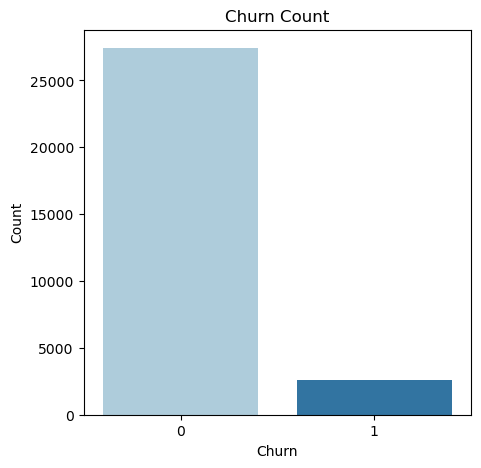

Churn Rate:  8.64 %


In [37]:
# Checking churned data
plt.figure(figsize=[5,5])
sns.countplot(x='churn', data=telecom_churn, palette='Paired')  # No label needed here
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Checking for the CHURN rate
churn_rate = round(100 * telecom_churn['churn'].mean(), 2)
print("Churn Rate: ", churn_rate, "%")

8.6% is the churned rate i.e. 8.6% customers have churned this indicates class imbalance.

##### Outlier Treatment

In [38]:
# Converting the churn column to data type object to proceed with Outlier Treatment.

telecom_churn['churn'] = telecom_churn['churn'].astype(object)

In [39]:
# Listing the numeric cols
num_cols = telecom_churn.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_6_7'],
      dtype='object', length=134)


In [40]:
telecom_churn.describe(percentiles=[0.01, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,2

In [41]:
# Removing the outliers below 10th and above 90th percentile and assigning the filtered dataset into telecom_churn_new.
for col in num_cols: 
    q1 = telecom_churn[col].quantile(0.10)
    q3 =telecom_churn[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr

    telecom_churn_new = telecom_churn.loc[(telecom_churn[col] > range_low) & (telecom_churn[col] < range_high)]

telecom_churn_new.shape

(29700, 135)

Adding the new column named dec_rec_act. To know, if the number of recharges for a customer when compared to good phase is decreased in action phase or not.

In [42]:
# Average rech at action phase (taking average because there are two months(7 and 8) in action phase)
telecom_churn_new['avg_rech_num_action'] = (telecom_churn_new['total_rech_num_7'] + telecom_churn_new['total_rech_num_8'])/2


In [43]:
# Finding the difference between total_rech_num_6 and avg_rech_action
telecom_churn_new['diff_rech_num'] = telecom_churn_new['avg_rech_num_action'] - telecom_churn_new['total_rech_num_6']

In [44]:
# Checking if recharge number has decreased in action phase, 1=Yes, 0=No
telecom_churn_new['dec_rech_action'] = np.where((telecom_churn_new['diff_rech_num'] < 0), 1, 0)

In [45]:
telecom_churn_new.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,churn,avg_rech_num_action,diff_rech_num,dec_rech_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1185.0,1,6.0,1.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,519.0,0,17.5,-1.5,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41

Adding ‘dec_avg_revenue_per_cust_action’ to determine if the average revenue per customer has decreased in the action phase compared to the good phase.

In [46]:
## Taking average of 7th and 8th month in action phase
telecom_churn_new['avg_arpu_action'] = (telecom_churn_new['arpu_7']+telecom_churn_new['arpu_8'])/2

In [47]:
# Taking the difference between good phase and action phase 
telecom_churn_new['diff_arpu'] = telecom_churn_new['avg_arpu_action'] - telecom_churn_new['arpu_6']

In [48]:
# Checking if the arpu has decreased on the action phase, 1=Yes, 0=No
telecom_churn_new['dec_avg_revenue_per_cust_action'] = np.where((telecom_churn_new['diff_arpu'] < 0), 1, 0)

In [49]:
telecom_churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,519.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.4

Adding ‘dec_rech_amt_action’ to determine if recharge amount of customers has decreased in the action phase compared to the good phase.

In [50]:
# Taking average of 7th and 8th month in action phase
telecom_churn_new['avg_rech_amt_action'] = (telecom_churn['total_rech_amt_7']+telecom_churn['total_rech_amt_8'])/2

In [51]:
# Taking the difference between action phase recharge amount and good phase recharge amount
telecom_churn_new['diff_rech_amt'] = telecom_churn_new['avg_rech_amt_action'] - telecom_churn_new['total_rech_amt_6']

In [52]:
# Checking if recharge amount has decreased in action phase, 1=Yes, 0=No
telecom_churn_new['dec_rech_amt_action'] = np.where((telecom_churn_new['diff_rech_amt'] < 0), 1, 0) 

In [53]:
telecom_churn_new.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenue_per_cust_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1185.0,1,6.0,1.0,0,2260.6650,1191.4850,0,2214.0,634.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,519.0,0,17.5,-1.5,1,314.7925,-63.9285,1,360.5,-76.5,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.7

Adding ‘dec_MOU_action’ to determine if minutes of usages for the customers has decreased in the action phase compared to the good phase.

In [54]:
# Total mou(minutes of usage) in outgoing and incoming
telecom_churn_new['total_mou_good'] = (telecom_churn_new['total_og_mou_6'] + telecom_churn_new['total_ic_mou_6'])

In [55]:
# Average mou at action phase
telecom_churn_new['avg_mou_action'] = (telecom_churn_new['total_og_mou_7'] + telecom_churn_new['total_og_mou_8'] + telecom_churn_new['total_ic_mou_7'] + telecom_churn_new['total_ic_mou_8'])/2

In [56]:
# Difference between avg_mou_good and avg_mou_action
telecom_churn_new['diff_mou'] = telecom_churn_new['avg_mou_action'] - telecom_churn_new['total_mou_good']

In [57]:
# Checking if the mou has decreased in action phase, 1=Yes, 0=No
telecom_churn_new['dec_MOU_action'] = np.where((telecom_churn_new['diff_mou'] < 0), 1, 0)

In [58]:
telecom_churn_new.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenue_per_cust_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action,total_mou_good,avg_mou_action,diff_mou,dec_MOU_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1185.0,1,6.0,1.0,0,2260.6650,1191.4850,0,2214.0,634.0,0,1113.99,973.090,-140.900,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,519.0,0,17.5,-1.5,1,314.7925,-63.9285,1,360.5,-76.5,1,612.22,324.125,-288.095,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353

#### EDA

In [59]:
## Univariate Analysis

In [60]:
# Converting churn column to integer to do aggfunc in the pivot table
telecom_churn_new['churn'] = telecom_churn_new['churn'].astype('int64')

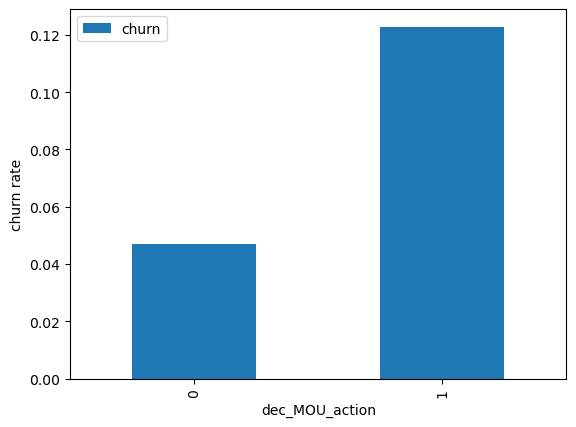

In [61]:
# Bar Plot
telecom_churn_new.pivot_table(values='churn', index='dec_MOU_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Insight: The churn rate is higher for customers whose minutes of usage (MOU) decreased during the action phase compared to the good phase.

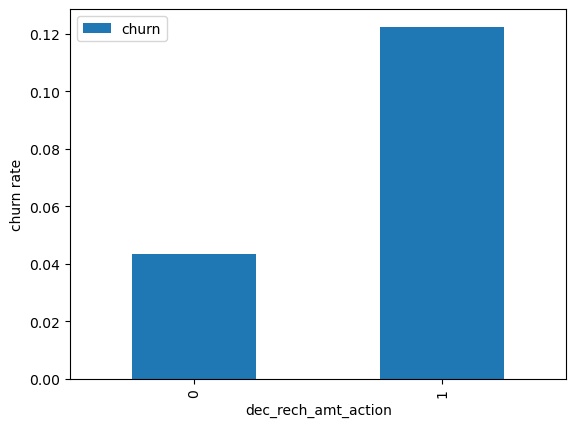

In [62]:
# Churn rate if the customer decreased his/her amount of recharge in action phase

telecom_churn_new.pivot_table(values='churn', index='dec_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Insight: Similarly, we observe that the churn rate is higher for customers whose recharge amount during the action phase is lower than during the good phase.

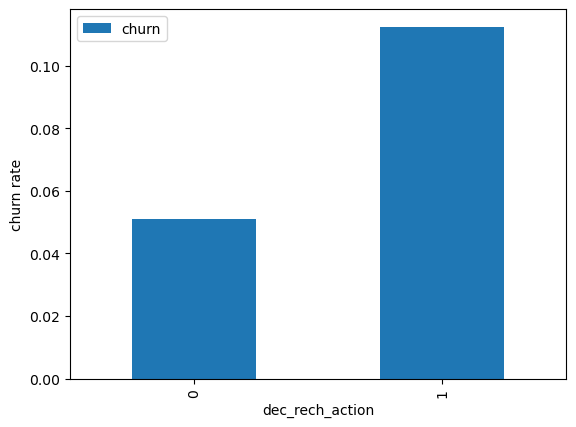

In [63]:
# Churn rate if the customer decreased his/her recharge number in action phase
telecom_churn_new.pivot_table(values='churn', index='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Insight: The churn rate is higher for customers whose number of recharges during the action phase is lower than during the good phase. The three plots above indicate that customers are less likely to perform monthly recharges when they are in the action phase.









In [64]:
# Creating churn dataframe
churn_data = telecom_churn_new[telecom_churn_new['churn'] == 1]

In [65]:
# Creating not churn dataframe
Non_churn_data = telecom_churn_new[telecom_churn_new['churn'] == 0]

[Text(0.5, 0, 'Action phase MOU')]

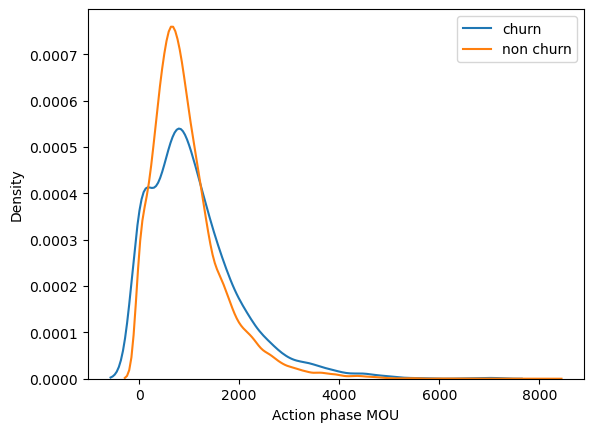

In [66]:
# Distribution plot
ax = sns.distplot(churn_data['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(Non_churn_data['total_mou_good'],label='non churn',hist=False)
plt.legend(loc='best')
ax.set(xlabel='Action phase MOU')

Insights: Customers that churn tend to have minutes of usage (MOU) that range from 0 to 2500. Higher the MOU, the lesser the churn probability

In [67]:
## Bivariate Analysis

In [68]:
# Analising recharge amount and number of recharge in action month

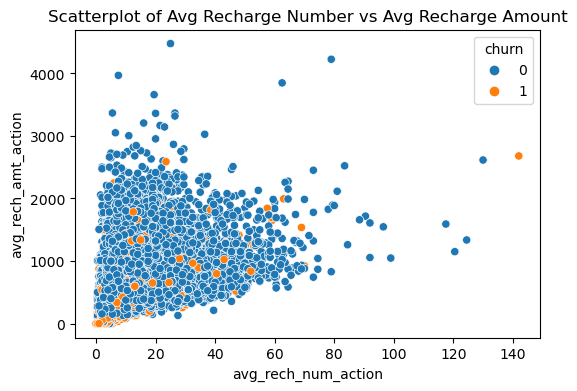

In [69]:
plt.figure(figsize=(6,4))

# Specifying the x and y axes explicitly
fig = sns.scatterplot(x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn', data=telecom_churn_new)

plt.title("Scatterplot of Avg Recharge Number vs Avg Recharge Amount")
plt.show()

Insight: The pattern above shows that the number of recharges and the recharge amount are nearly proportional: the higher the number of recharges, the higher the total recharge amount.

In [70]:
# Analyzing churn rate in relation to the decreasing recharge amount and number of recharges during the action phase.

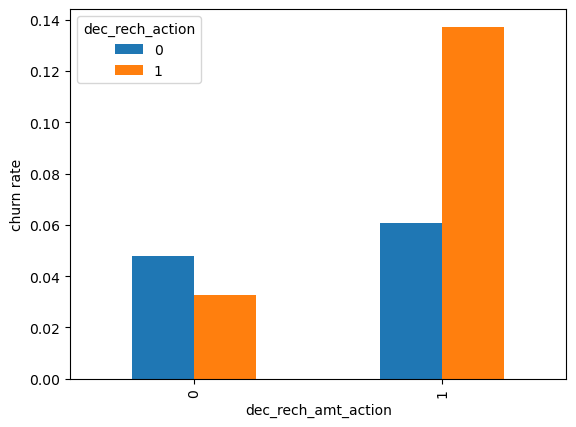

In [71]:
telecom_churn_new.pivot_table(values='churn', index='dec_rech_amt_action', columns='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Insight: The plot above indicates that the churn rate is higher for customers whose recharge amount and number of recharges have decreased during the action phase compared to the good phase.

In [72]:
# Creating function for Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    telecom_churn_df = telecom_churn_new
    plt.subplot(2,3,1)
    sns.boxplot(data=telecom_churn_df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("magma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=telecom_churn_df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("magma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=telecom_churn_df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("magma"))
    plt.show()

In [73]:
rech_amt_cols = telecom_churn.columns[telecom_churn.columns.str.contains('rech_amt')]
rech_amt_cols.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

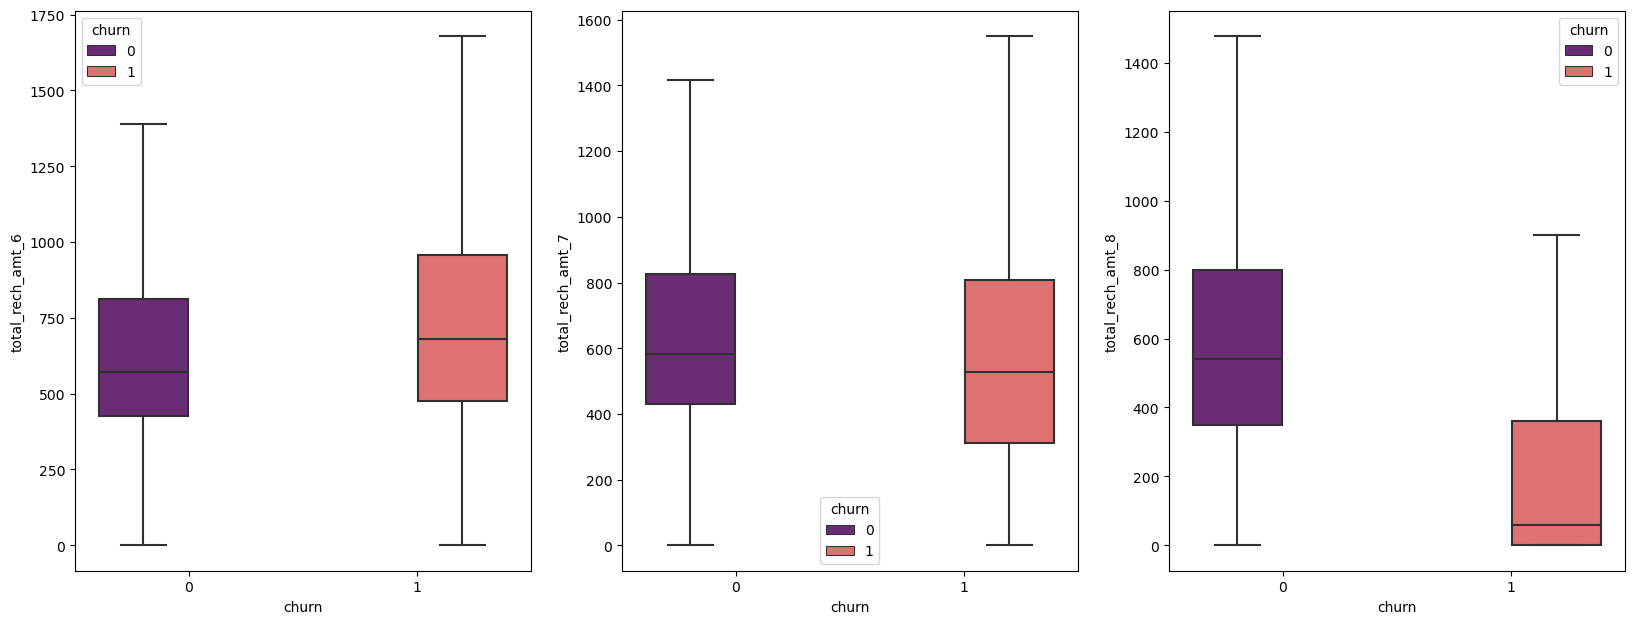

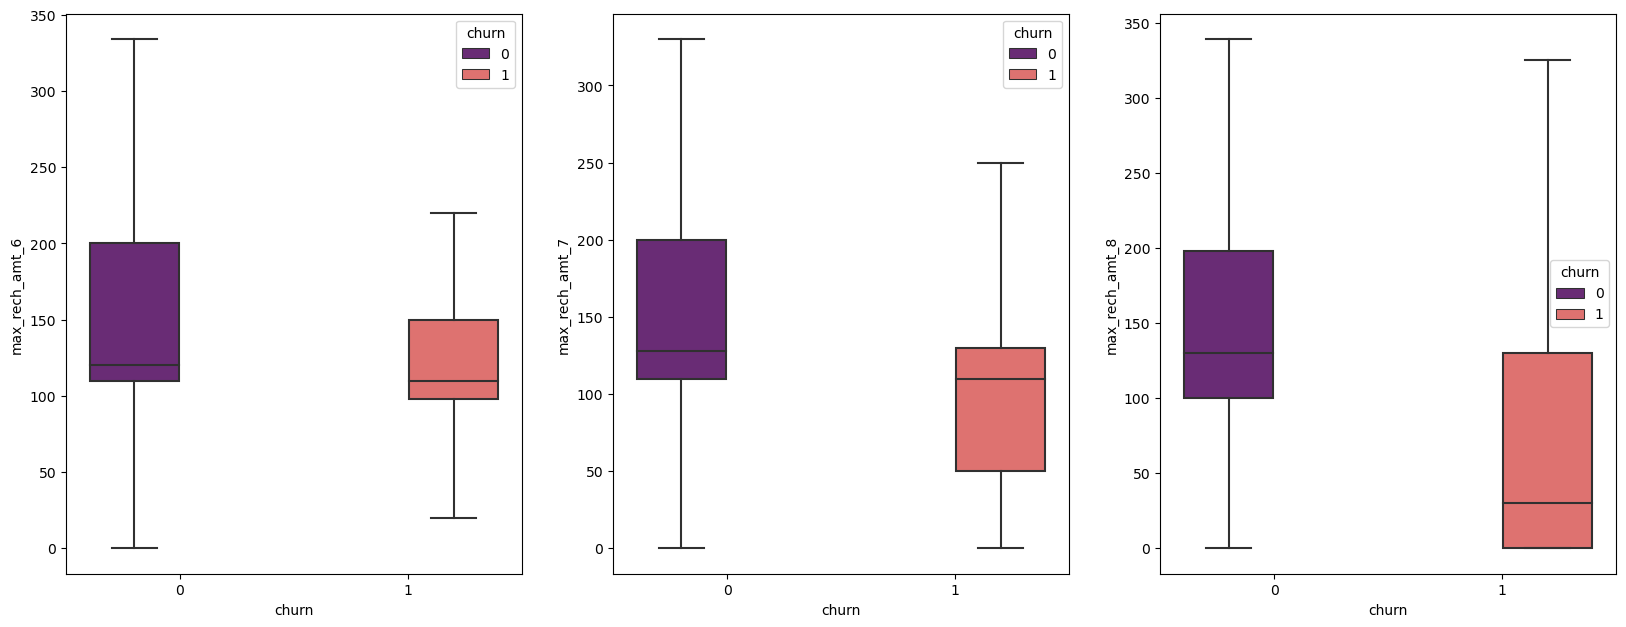

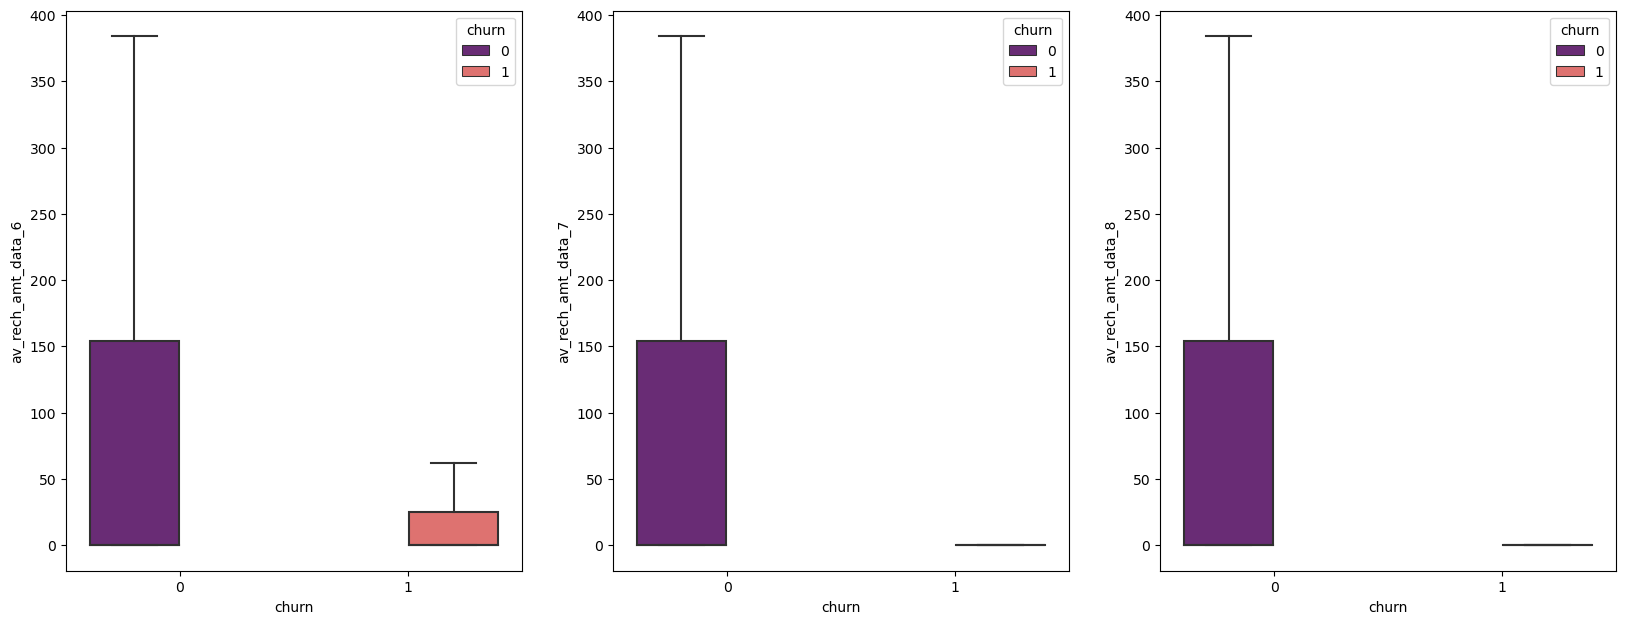

In [74]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')
plot_box_chart('av_rech_amt_data')

Insight: The above plots clearly show that both the total and maximum recharge amounts began to decline in month 8, which is close to the churn phase.

In [75]:
# Dropping some derived columns that are not furthur required.

telecom_churn_new = telecom_churn_new.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_rech_6_7'], axis=1)

In [76]:
# Function to create box plot
def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        
        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1

In [77]:
# Plotting the distribution for recharge named recharge amount
col_rech = [col for col in telecom_churn_new.columns if 'rech' in col]
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'dec_rech_action',
 'dec_rech_amt_action']

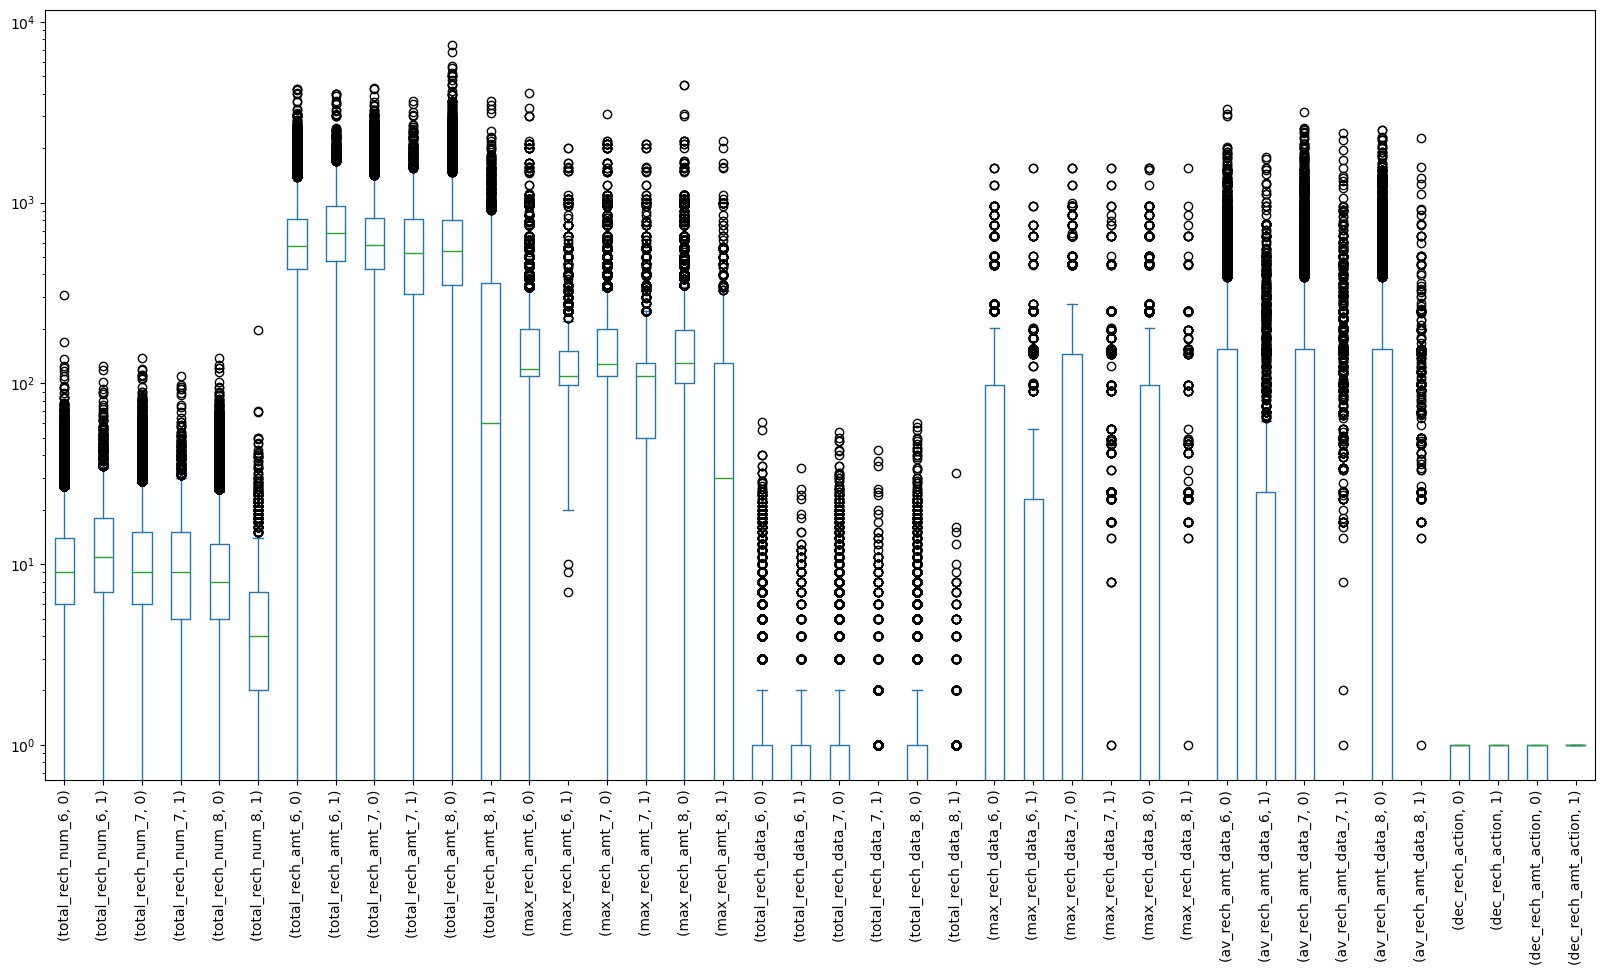

In [78]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

telecom_churn_new.pivot(columns='churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

#### Train Test Split

In [79]:
# Putting feature variables into X
X = telecom_churn_new.drop(['churn'], axis=1)

# Putting target variable to y
y = telecom_churn_new.pop('churn')

In [80]:
# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100, stratify=y)

In [81]:
X.shape

(29700, 137)

In [82]:
y.shape

(29700,)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20790, 137), (8910, 137), (20790,), (8910,))

In [84]:
# Dealing with Class Imbalance using Synthetic Minority Oversampling Technique(SMOTE)

In [85]:
#!pip install imbalanced-learn

In [86]:
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn

In [87]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [88]:
# Instantiating SMOTE
SMT = SMOTE(random_state=42)

In [89]:
# Fittign SMOTE to the train set
X_train, y_train = SMT.fit_resample(X_train, y_train)

In [90]:
X_train.shape, y_train.shape

((38004, 137), (38004,))

In [91]:
## Scaling numeric features

During our exploratory data analysis, we identified several outliers in the numeric features. As a result, we decided to use Robust Scaling, which leverages median and quantile values, instead of Standard Scaling, which uses mean and standard deviation.

In [92]:
# Instantiate the Scaler
scaler = StandardScaler()

In [93]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenue_per_cust_action,dec_rech_amt_action,dec_MOU_action
0,1409.374,1052.632,1674.240,453.28,343.38,589.58,826.99,811.99,815.96,70.83,39.78,121.14,116.76,69.06,228.88,415.74,313.88,457.94,556.73,635.79,627.58,0.00,0.81,2.50,0.00,0.0,0.00,972.48,950.49,1088.03,4.68,3.38,1.28,184.41,132.43,86.66,0.00,0.00,0.68,189.09,135.81,88.63,0.0,0.0,0.0,1.93,0.00,0.00,0.0,0.0,0.0,1163.51,1086.31,1176.66,268.74,346.29,291.99,768.03,733.01,470.96,18.14,11.83,1.44,1054.93,1091.14,764.41,5.59,2.03,0.00,36.28,61.58,55.23,3.15,0.00,5.65,45.03,63.61,60.88,1099.96,1154.76,831.43,0.0,0.0,0.00,0.00,0.0,6.13,0.0,0.0,0.0,14.0,10.0,13.0,1760.0,1048.0,1970.0,250.0,250.0,250.0,0.0,200.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1791.0,0.00,0.00,0.00,1,1,1,1
1,388.899,533.338,675.705,13.28,11.94,48.51,201.43,230.93,277.83,0.00,0.00,0.00,0.00,0.00,0.00,7.16,8.86,30.91,188.41,219.04,245.49,10.01,0.36,11.81,0.15,0.0,0.00,205.59,228.28,288.23,6.11,3.08,17.59,2.85,6.49,16.98,0.00,0.00,3.53,8.96,9.58,38.11,0.0,0.0,0.0,0.15,5.01,0.00,0.0,0.0,0.0,214.71,242.88,326.34,7.04,5.38,11.56,183.64,600.43,251.44,24.83,71.06,29.36,215.53,676.88,292.38,3.24,4.06,7.86,0.85,4.45,8.91,0.00,0.00,2.31,4.09,8.51,19.09,219.76,685.39,311.48,0.0,0.0,0.00,0.13,0.0,0.00,0.0,0.0,0.0,2.0,6.0,4.0,379.0,532.0,1034.0,379.0,250.0,400.0,0.0,27.0,350.0,0.0,1.0,1.0,0.0,145.0,154.0,0.0,145.0,154.0,0.00,1.84,3.87,0.00,478.99,127.33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2372.0,38.22,114.06,236.82,0,0,0,0
2,19.421,597.255,709.648,3.68,1031.28,1018.29,24.89,927.86,1043.43,0.00,0.00,0.00,0.00,0.00,0.00,0.05,3.18,3.24,1.03,16.59,7.04,0.00,0.00,0.00,5.46,0.0,0.00,1.08,19.78,10.29,3.63,1028.09,1015.04,18.39,907.38,1028.61,0.00,0.00,0.00,22.03,1935.48,2043.66,0.0,0.0,0.0,5.46,6.21,8.86,0.0,0.0,0.0,28.58,1961.48,2062.83,6.39,1.48,11.64,11.35,8.81,23.16,0.00,0.00,0.00,17.74,10.29,34.81,0.68,0.18,0.09,15.34,62.48,5.41,0.00,0.00,0.00,16.03,62.66,5.51,33.78,73.56,40.58,0.0,0.6,0.25,0.00,0.0,0.00

In [94]:
# Scaling train dataset

In [95]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
print("Total scalable columns: ", len(cols_scale))

Total scalable columns:  137


In [96]:
binary_cols_to_remove = ['dec_MOU_action', 'dec_rech_action', 'dec_rech_amt_action', 'dec_avg_revenuePC_action']

# Only remove columns if they exist in cols_scale
for col in binary_cols_to_remove:
    if col in cols_scale:
        cols_scale.remove(col)
    else:
        print(f"Column '{col}' not found in cols_scale")

print("Scalable cols after removing : ", len(cols_scale))

Column 'dec_avg_revenuePC_action' not found in cols_scale
Scalable cols after removing :  134


In [97]:
# Fitting the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [98]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenue_per_cust_action,dec_rech_amt_action,dec_MOU_action
0,2.418846,1.624535,3.548178,0.233534,0.105372,1.020555,0.810453,0.890717,1.396488,0.519654,0.290435,1.414310,0.655053,0.378360,1.977165,1.561058,1.163349,2.237343,1.916603,2.470703,2.813344,-0.307540,-0.243456,-0.094266,-0.216856,-0.195934,-0.212712,2.215807,2.307374,3.152091,-0.526658,-0.501765,-0.372622,-0.162334,-0.222092,-0.130697,-0.147085,-0.136903,-0.044276,-0.484669,-0.499741,-0.335694,-0.121572,-0.107685,-0.072714,-0.246658,-0.359142,-0.261098,-0.362035,-0.020471,-0.011928,0.623107,0.649544,1.265241,1.651333,2.024576,2.087408,2.993343,3.072927,2.139568,0.188475,0.006666,-0.225616,2.983418,3.173769,2.455526,-0.174058,-0.199174,-0.198207,0.043779,0.339001,0.415767,0.060275,-0.140738,0.287172,-0.047439,0.138439,0.266719,2.533213,2.756053,2.156777,-0.364701,-0.140149,-0.162343,-0.176283,-0.164792,-0.026433,-0.089009,-0.087381,-0.075481,0.089079,-0.174676,0.602659,2.660514,1.073015,3.525642,0.603281,0.556542,0.926442,-0.776662,0.882346,0.585155,-0.406430,-0.398660,-0.356823,-0.478068,-0.455527,-0.409944,-0.447408,-0.437475,-0.381794,-0.264984,-0.244966,-0.197610,-0.290810,-0.292996,-0.252068,-0.288918,-0.281039,-0.242166,-0.292363,-0.293585,-0.284884,-0.286506,-0.286242,-0.237653,-0.155656,-0.152618,-0.120673,0.801417,-0.268916,-0.294239,-0.287378,1,0.802487,1,1
1,-0.597050,0.015037,0.821410,-0.662909,-0.619927,-0.373885,-0.484396,-0.345404,0.047175,-0.223289,-0.237172,-0.240970,-0.280827,-0.298677,-0.285948,-0.331266,-0.296784,-0.129133,0.204613,0.419489,0.767176,0.321438,-0.271727,0.542560,-0.197364,-0.195934,-0.212712,-0.066629,0.058897,0.434578,-0.523526,-0.502486,-0.324551,-0.563414,-0.510522,-0.337579,-0.147085,-0.136903,0.279219,-0.761502,-0.705028,-0.434970,-0.121572,-0.107685,-0.072714,-0.348290,-0.110297,-0.261098,-0.362035,-0.020471,-0.011928,-0.777077,-0.638600,-0.167262,-0.380708,-0.335045,-0.250440,0.232059,2.404028,0.890613,0.372023,1.533520,0.620625,0.047748,1.715894,0.583065,-0.211012,-0.167134,-0.039986,-0.332968,-0.2609

In [99]:
## Scaling the test dataset

## Test set can only be transformed

In [100]:
# Transforming the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenue_per_cust_action,dec_rech_amt_action,dec_MOU_action
2722,0.154513,0.425422,1.028796,1.975813,2.599867,3.366649,-0.372311,-0.400290,-0.218485,-0.223289,-0.237172,-0.24097,-0.280827,-0.289364,-0.285948,0.098673,-0.183571,0.211017,-0.052521,-0.027422,-0.176999,-0.279264,-0.294343,-0.189345,-0.216856,-0.195934,-0.212712,0.016557,-0.151315,0.007686,2.110195,2.975835,3.772334,-0.300136,-0.354352,-0.086399,-0.147085,-0.136903,-0.121461,1.269478,1.760239,2.455827,-0.121572,-0.107685,-0.072714,-0.286625,-0.124204,-0.060467,0.153735,-0.020471,-0.011928,1.217683,1.573006,2.105687,0.232088,0.121638,0.669093,-0.432333,0.031549,-0.342013,-0.283702,-0.298292,-0.234102,-0.251624,0.043136,0.049329,0.088077,0.579900,0.078780,0.099924,-0.094919,-0.044886,-0.137955,-0.140738,-0.114079,0.101499,0.202286,-0.013309,-0.193911,0.098215,0.009116,-0.364701,-0.140149,-0.162343,-0.062278,-0.070202,-0.124446,-0.089009,-0.087381,-0.075481,-0.519726,-0.390797,0.125427,0.352854,0.571124,1.176294,-0.251386,-0.172980,0.220506,0.180159,0.309678,0.762179,-0.406430,-0.398660,-0.356823,-0.478068,-0.455527,-0.409944,-0.447408,-0.437475,-0.381794,-0.264984,-0.244966,-0.197610,-0.29081,-0.292996,-0.252068,-0.288918,-0.281039,-0.242166,-0.292363,-0.293585,-0.284884,-0.286506,-0.286242,-0.237653,-0.155656,-0.152618,-0.120673,-0.695122,-0.268916,-0.294239,-0.287378,0,-1.246127,0,0
28720,-0.902386,-0.535509,0.872923,-0.634427,-0.493792,-0.230001,-0.537696,-0.392611,-0.128945,-0.223289,-0.237172,-0.24097,-0.280827,-0.298677,-0.285948,-0.238174,-0.006117,0.277795,0.115462,0.347973,0.509805,-0.097671,-0.294343,-0.249539,-0.216856,-0.195934,-0.212712,-0.083742,0.201519,0.481399,-0.536910,-0.509886,-0.376395,-0.562884,-0.519751,-0.359520,-0.147085,0.026802,-0.084004,-0.770523,-0.713729,-0.490346,-0.121572,-0.107685,-0.072714,-0.356854,-0.359142,-0.261098,-0.362035,-0.020471,-0.011928,-0.794446,-0.584458,-0.191522,-0.249483,0.035464,0.838327,0.695778,0.844844,1.270500,-0.309218,-0.298292,-0.269261,0.363209,0.566620,1.249492,-0.261961,-0.231215,-

#### Model building with PCA

In [101]:
# Instantiating PCA
PCA = PCA(svd_solver='randomized', random_state=100)

In [102]:
# Fitting the train set on PCA
PCA.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [103]:
# Looking Principal components
PCA.components_

array([[ 3.21670290e-02,  1.13764705e-01,  1.57624357e-01, ...,
        -7.28075557e-02, -3.54914727e-02, -3.07505149e-02],
       [ 6.05998406e-02,  1.17996087e-01,  1.04253187e-01, ...,
        -2.89352102e-02, -1.34199837e-02, -6.52887591e-03],
       [ 4.79833998e-02,  1.59941322e-01,  1.43358898e-01, ...,
        -7.53262239e-02, -3.80164975e-02, -3.62002814e-02],
       ...,
       [-3.75312529e-16,  2.49227241e-17,  2.18256824e-17, ...,
         2.82636580e-19, -1.42223847e-16,  5.75512422e-17],
       [ 0.00000000e+00, -1.74613729e-16, -3.88142651e-17, ...,
         7.55267566e-17, -3.16801405e-16, -1.82273707e-16],
       [ 0.00000000e+00,  1.28467916e-16, -2.74040222e-16, ...,
        -6.42094651e-18,  2.99875295e-17, -6.11485239e-17]])

In [104]:
# Cumuliative varinace of the principal components.
cumu_var = np.round(np.cumsum(PCA.explained_variance_ratio_)*100, decimals=4)
print(cumu_var)

[ 10.3979  18.6176  24.9776  29.2155  33.3161  37.1701  40.4633  43.2135
  45.6288  48.0016  50.1148  52.187   54.249   56.1974  57.9738  59.6709
  61.3335  62.7869  64.1745  65.5276  66.799   68.0031  69.1779  70.2671
  71.3279  72.3223  73.2868  74.1829  75.0665  75.9266  76.7336  77.5242
  78.289   79.0368  79.7701  80.4968  81.2006  81.8948  82.5504  83.1998
  83.8199  84.408   84.9562  85.4749  85.9827  86.4727  86.9495  87.4193
  87.8509  88.2728  88.6837  89.0844  89.4824  89.8586  90.2309  90.5962
  90.9568  91.3054  91.6437  91.9742  92.2972  92.6192  92.9132  93.1987
  93.4738  93.7369  93.995   94.2426  94.4847  94.725   94.9592  95.1893
  95.4114  95.6324  95.8459  96.0555  96.2622  96.4629  96.6594  96.854
  97.0455  97.2316  97.403   97.5741  97.7394  97.9031  98.064   98.207
  98.3424  98.4754  98.6048  98.7324  98.8537  98.9689  99.0775  99.1777
  99.2703  99.3561  99.4398  99.5186  99.592   99.6643  99.7298  99.7908
  99.8442  99.8809  99.9148  99.9456  99.9726  99.99 

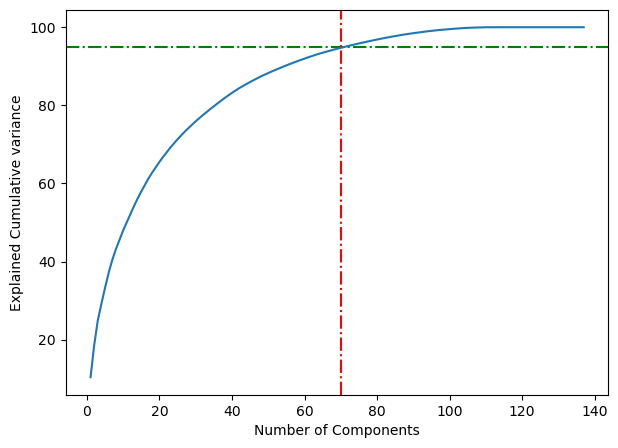

In [105]:
# # Plotting scree plot
fig = plt.figure(figsize=[7,5])
plt.axhline(y=95, color='g', linestyle='-.')
plt.axvline(x=70, color='r', linestyle='-.')
plt.plot(range(1, len(PCA.explained_variance_ratio_)+1),cumu_var)
plt.xlabel('Number of Components')
plt.ylabel("Explained Cumulative variance")
plt.show()

Insight: Based on the above analysis, it appears that 70 components are sufficient to explain 95% of the variance in the dataset. Therefore, we will select 70 components for our modeling.

In [106]:
# Using Incremental PCA for better efficiency

In [107]:
from sklearn.decomposition import IncrementalPCA

In [108]:
PCA_final = IncrementalPCA(n_components = 70)
X_train_PCA = PCA_final.fit_transform(X_train)

In [109]:
X_train.shape

(38004, 137)

In [110]:
X_train_PCA.shape

(38004, 70)

In [111]:
# Correlation matrix creation
Corr_mat = np.corrcoef(X_train_PCA.transpose())

In [112]:
## Diagonal matrix with diagonal entry of 'Corr_mat'
p = np.diagflat(Corr_mat.diagonal())

In [113]:
# Subtracting diagonal entries making all diagonals 0
Corr_mat_diag_zero = Corr_mat - p
print("max positive corr:",round(Corr_mat_diag_zero.max(),3), ", min negative corr: ", round(Corr_mat_diag_zero.min(),3))

max positive corr: 0.011 , min negative corr:  -0.013


Since the correlation among the attributes is nearly zero, we can move forward with these principal components.

We are applying the transformation only to the test set, not performing Fit-Transform. The fitting was already completed on the training set, so we just need to transform the test set using the parameters derived from the training set.

In [114]:
# Applying transformation on the test dataset

In [115]:
X_test_PCA = PCA_final.transform(X_test)
X_test_PCA.shape

(8910, 70)

#### Model Building

In [116]:
## 1. Logistic Regression

In [117]:
Log_reg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [118]:
# Training the model on the data
Log_reg.fit(X_train_PCA, y_train)

LogisticRegression(class_weight='balanced')

In [119]:
# Predicting test data
y_pred = Log_reg.predict(X_test_PCA)

In [120]:
# Creating confusion matrix
Conf_mat = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n", Conf_mat)

confusoin matrix 	
 [[6745 1398]
 [ 140  627]]


In [121]:
# Checking sesitivity 
print("sensitivity \t", (Conf_mat[1,1]/(Conf_mat[1,0]+Conf_mat[1,1])).round(2))

sensitivity 	 0.82


In [122]:
# Checking  specificity
print("specificity \t", (Conf_mat[0,0]/(Conf_mat[0,0]+Conf_mat[0,1])).round(2))

specificity 	 0.83


In [123]:
# Checking the area under the curve
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

area under the curve 	 0.82


In [124]:
## Tuning hyperparameter C

In [125]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [126]:
# Creating Stratified K-Fold object with 5 splits
K_Folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = K_Folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_PCA, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [127]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.100230,0.012579,0.000000,0.000000,0.01,{'C': 0.01},0.908147,0.915229,0.911483,0.907630,0.913002,0.911098,0.002883,6,0.913106,0.911616,0.912090,0.913286,0.911957,0.912411,0.000662
1,0.137908,0.035119,0.006348,0.007776,0.10,{'C': 0.1},0.908172,0.915256,0.911629,0.907895,0.913082,0.911207,0.002838,5,0.913297,0.911811,0.912270,0.913434,0.912113,0.912585,0.000656
2,0.185805,0.020884,0.009586,0.007829,1.00,{'C': 1},0.908175,0.915277,0.911725,0.908005,0.913203,0.911277,0.002837,4,0.913371,0.911906,0.912353,0.913506,0.912175,0.912662,0.000651
3,0.134791,0.012253,0.003146,0.006291,10.00,{'C': 10},0.908180,0.915257,0.911746,0.908045,0.913234,0.911293,0.002826,1,0.913394,0.911919,0.912370,0.913524,0.912187,0.912679,0.000654
4,0.169633,0.030469,0.009419,0.007691,100.00,{'C': 100},0.908182,0.915258,0.911737,0.908043,0.913242,0.911292,0.002827,2,0.913393,0.911921,0.912365,0.913518,0.912188,0.912677,0.000652
5,0.131829,0.007794,0.000000,0.000000,1000.00,{'C': 1000},0.908183,0.915258,0.911737,0.908043,0.913241,0.911292,0.002827,3,0.913393,0.911921,0.912365,0.913518,0.912188,0.912677,0.000653


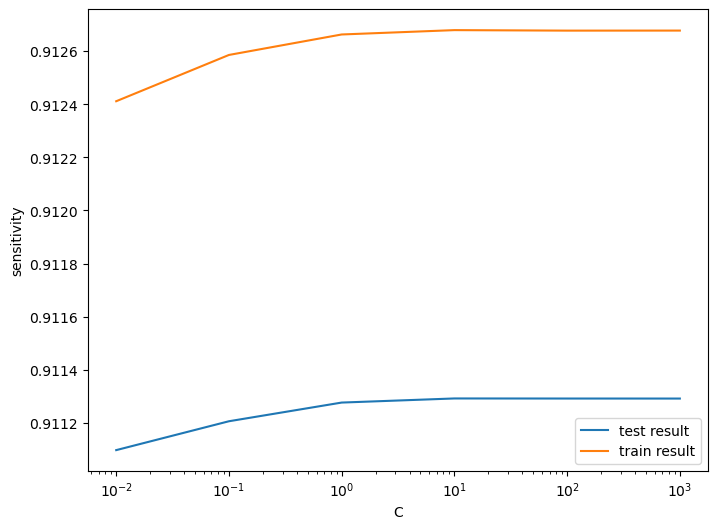

In [128]:
 # Plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [129]:
# Best score
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score,best_C))

 The highest test sensitivity is 0.9112925586028169 at C = 10


In [130]:
## MODEL WITH OPTIMUM Paramaters

In [131]:
# Instantiate the model with best C
logistic_PCA = LogisticRegression(C=best_C)

In [132]:
# Fit the model on the train set
log_pca_model = logistic_PCA.fit(X_train_PCA, y_train)

In [133]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_PCA)

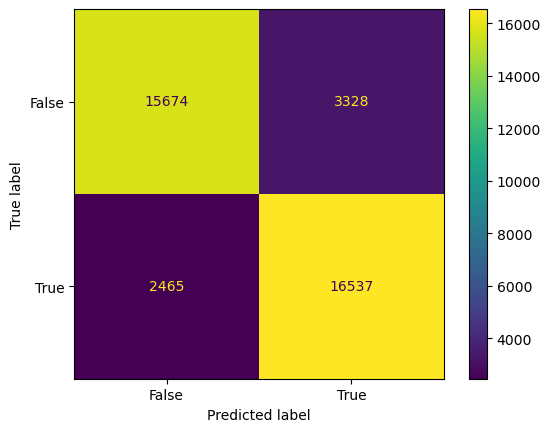

In [134]:
## Confusion Matrix.

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()  

In [135]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [136]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_PCA)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

Accuracy:- 0.8475686769813704
Sensitivity:- 0.8702768129670561
Specificity:- 0.8248605409956846
Recall:- 0.8702768129670561
AUC:    	 0.91


In [137]:
## Prediction on the test set

In [138]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_PCA)

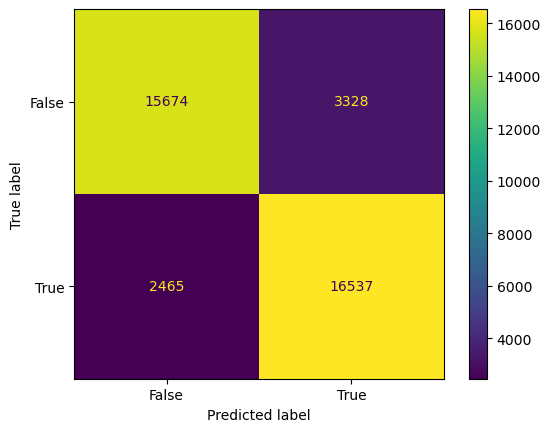

In [139]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [140]:
# Accuracy
print("Accuracy:-    \t",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-  \t",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-  \t", round(TN / float(TN+FP),2))

# Recall
print("Recall:-    \t" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_PCA)[:, 1]
print("AUC:-    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy:-    	 0.83
Sensitivity:-  	 0.87
Specificity:-  	 0.82
Recall:-    	 0.87
AUC:-    	 0.89


Insight: Overall, the model demonstrates strong performance on the test set, reflecting the knowledge it gained from the training set.

In [141]:
## Decision tree with PCA

In [142]:
# Creating the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model for best results.
d_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = d_tree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_PCA,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [143]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.307411,0.070739,0.006354,0.007783,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.772105,0.792105,0.808998,0.810839,0.808947,0.798599,0.014894,7
1,1.355264,0.185167,0.009400,0.007675,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.772105,0.792105,0.808998,0.810839,0.808947,0.798599,0.014894,7
2,1.232434,0.092391,0.003125,0.006250,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.775000,0.793684,0.805051,0.811102,0.810789,0.799125,0.013611,5
3,1.285720,0.099170,0.009371,0.007651,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.775000,0.793684,0.805051,0.811102,0.810789,0.799125,0.013611,5
4,2.094083,0.125951,0.009361,0.007644,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.838947,0.847632,0.843462,0.855564,0.837105,0.844542,0.006615,2
5,2.054429,0.230033,0.006249,0.007653,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.838947,0.847632,0.844252,0.855038,0.837105,0.844595,0.006425,1
6,1.937059,0.164443,0.003127,0.006253,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.817632,0.859211,0.847409,0.857143,0.824211,0.841121,0.017095,4
7,1.918468,0.084648,0.006250,0.007654,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.817632,0.859211,0.847409,0.857932,0.824211,0.841279,0.017245,3


In [144]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8445947742283886
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [145]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=10)

dt_pca_model.fit(X_train_PCA, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=10,
                       random_state=100)

In [146]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_PCA)

In [147]:
# Creating Confusion matrix
confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[16486,  2516],
       [ 2406, 16596]], dtype=int64)

In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# Area under curve
print("Area under curve is:", round(metrics.roc_auc_score(y_train, y_train_pred),2))

Accuracy:- 0.87
Sensitivity:- 0.87
Specificity:- 0.87
Recall:- 0.87
Area under curve is: 0.87


In [150]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_PCA)

In [151]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6881 1262]
 [ 206  561]]


In [152]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_test_pred),2))

Accuracy:- 0.84
Sensitivity:- 0.87
Specificity:- 0.87
Recall:- 0.87
Area under curve is: 0.79


In [153]:
y_pred = dt_pca_model.predict(X_test_PCA)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      8143
           1       0.31      0.73      0.43       767

    accuracy                           0.84      8910
   macro avg       0.64      0.79      0.67      8910
weighted avg       0.91      0.84      0.86      8910



Model summary (Decesion Trees with PCA)

Train set
Accuracy = 0.87
Sensitivity = 0.87
Specificity = 0.87
Recall = 0.87
roc_auc_score= 0.87
Test set
Accuracy = 0.84
Sensitivity = 0.87
Specificity = 0.87
Recall = 0.87
roc_auc_score= 0.79

The model’s performance shows that sensitivity and specificity remain consistent when evaluated on both the test set and the training set. However, while the accuracy slightly decreased on the test set, it still remains quite good.

In [154]:
## 3. Random forest with PCA

In [155]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [156]:
# fitting the random forest
rfc.fit(X_train_PCA,y_train)

RandomForestClassifier()

In [157]:
# Making predictions
predictions = rfc.predict(X_test_PCA)

In [158]:
# Checking the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8143
           1       0.48      0.53      0.50       767

    accuracy                           0.91      8910
   macro avg       0.72      0.74      0.73      8910
weighted avg       0.91      0.91      0.91      8910



In [159]:
# Printing confusion matrix
confusion=metrics.confusion_matrix(y_test,predictions)
confusion

array([[7705,  438],
       [ 362,  405]], dtype=int64)

In [160]:
print(accuracy_score(y_test,predictions))

0.9102132435465768


#### Hyperparameter Tuning for Random Forest

Looking at the optimum values for max_depth and how the value of max_depth impacts the overall accuracy of the ensemble.

In [161]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_PCA, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9421376134719115
{'max_depth': 17}


In [162]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.207503,0.355417,0.078117,9.464947e-07,2,{'max_depth': 2},0.774372,0.796474,0.783581,0.789238,0.786711,0.786075,0.007235,4,0.793113,0.787455,0.788080,0.786107,0.790093,0.788970,0.002438
1,45.174685,1.260295,0.134463,2.883451e-02,7,{'max_depth': 7},0.850414,0.863965,0.855808,0.862255,0.854342,0.857357,0.005047,3,0.871855,0.871756,0.869519,0.871197,0.872319,0.871329,0.000973
2,69.183818,2.056645,0.196989,2.100292e-02,12,{'max_depth': 12},0.920274,0.919484,0.919616,0.918826,0.913816,0.918403,0.002339,2,0.959576,0.959215,0.960037,0.960300,0.959019,0.959629,0.000482
3,64.182422,9.229323,0.153761,1.482940e-02,17,{'max_depth': 17},0.943165,0.942376,0.942771,0.942376,0.940000,0.942138,0.001108,1,0.985396,0.986054,0.986778,0.987008,0.986383,0.986324,0.000568


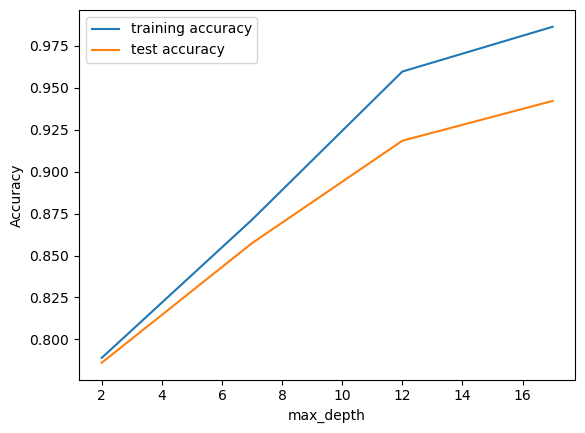

In [163]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increase the value of max_depth, both the training and testing scores improve up to a certain point. However, as the depth continues to grow, the ensemble begins to overfit the data.
Therefore, limiting the depth of the individual trees can help prevent overfitting in the forest model.

In [164]:
## Tuning n_estimators

Let’s examine the optimal values for n_estimators and analyze how this parameter affects overall accuracy. We’ll set a suitably low value for max_depth to prevent the trees from overfitting.

In [165]:
# Specifying number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# Instantiating the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fitting tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_PCA, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8209398555591715
{'n_estimators': 1100}


In [166]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,27.478060,0.533960,0.087490,0.007654,100,{'n_estimators': 100},0.808973,0.827523,0.816077,0.823313,0.818026,0.818782,0.006341,3,0.823669,0.825182,0.824294,0.819459,0.825648,0.823650,0.002205
1,163.816978,0.717996,0.513358,0.113138,600,{'n_estimators': 600},0.811341,0.827391,0.820287,0.825286,0.818947,0.820650,0.005597,2,0.826596,0.825708,0.824688,0.822879,0.826174,0.825209,0.001327
2,225.319974,38.542491,0.577802,0.113836,1100,{'n_estimators': 1100},0.811472,0.828838,0.820287,0.824891,0.819211,0.820940,0.005849,1,0.826136,0.826004,0.825182,0.822649,0.826437,0.825282,0.001380


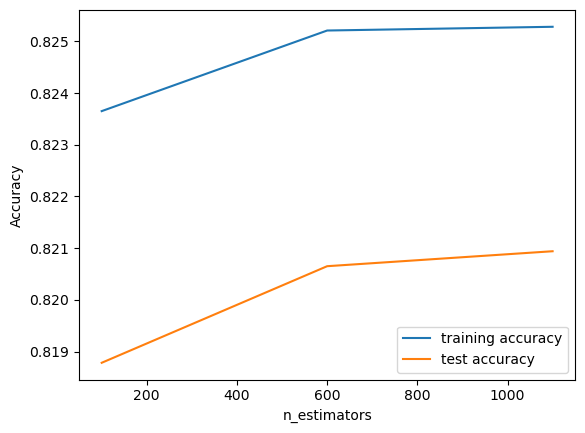

In [167]:
# Plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [168]:
## Tuning max_features

We’ll observe how the model’s performance changes with different values of max_features, which represents the maximum number of features considered for splitting at a node.

In [169]:
# Specifying number of folds for k-fold CV
n_folds = 5

# Parameters to build the model
parameters = {'max_features': [4, 8, 14, 20, 24]}

# Instantiating the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fitting tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_PCA, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8253340696168786
{'max_features': 14}


In [170]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.079773,0.155734,0.084364,0.007652,4,{'max_features': 4},0.793185,0.819892,0.804631,0.815945,0.812500,0.809231,0.009466,5,0.813275,0.813637,0.815906,0.812880,0.816833,0.814506,0.001568
1,26.902659,0.611093,0.084365,0.007653,8,{'max_features': 8},0.808973,0.827523,0.816077,0.823313,0.818026,0.818782,0.006341,2,0.823669,0.825182,0.824294,0.819459,0.825648,0.823650,0.002205
2,45.409760,0.264295,0.093740,0.009881,14,{'max_features': 14},0.817787,0.831601,0.826996,0.828970,0.821316,0.825334,0.005067,1,0.829655,0.828339,0.829589,0.825905,0.829891,0.828676,0.001487
3,67.857319,1.242280,0.089223,0.006173,20,{'max_features': 20},0.808578,0.824628,0.815419,0.822786,0.815263,0.817335,0.005789,4,0.822682,0.820380,0.821202,0.818932,0.821175,0.820874,0.001223
4,65.637207,10.280618,0.056557,0.016148,24,{'max_features': 24},0.806604,0.823576,0.818313,0.821997,0.817237,0.817546,0.005943,3,0.821761,0.821958,0.822254,0.820084,0.822721,0.821756,0.000896


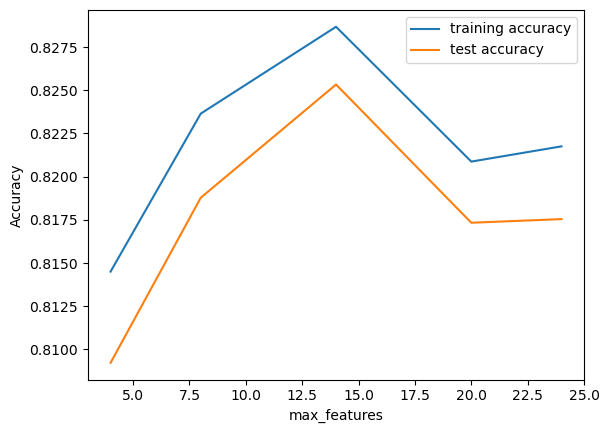

In [171]:
# Plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [172]:
## Tuning min_samples_leaf

The hyperparameter min_samples_leaf specifies the minimum number of samples required at a leaf node:

1. If an integer, min_samples_leaf represents the exact minimum number of samples.
2. If a float, min_samples_leaf is a percentage, and ceil(min_samples_leaf * n_samples) determines the minimum number of samples for each node.

In [173]:
# Specify number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# Instantiating the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# Fitting tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_PCA, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.853910091469959
{'min_samples_leaf': 100}


In [174]:
# GridSearch CV Scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,60.461771,1.749033,0.234512,0.032657,100,{'min_samples_leaf': 100},0.843442,0.859492,0.855414,0.858177,0.853026,0.853910,0.005692,1,0.866954,0.864849,0.864652,0.862316,0.865445,0.864843,0.001499
1,53.572512,3.206142,0.209353,0.086481,150,{'min_samples_leaf': 150},0.831075,0.848573,0.845810,0.849099,0.846447,0.844201,0.006679,2,0.854587,0.851692,0.853995,0.851594,0.854888,0.853351,0.001424
2,45.646922,1.424607,0.137488,0.011695,200,{'min_samples_leaf': 200},0.826602,0.844099,0.839889,0.841994,0.839474,0.838412,0.006131,3,0.847647,0.846989,0.846759,0.842746,0.847224,0.846273,0.001788
3,43.426502,0.649396,0.165608,0.035074,250,{'min_samples_leaf': 250},0.823313,0.840679,0.832259,0.841468,0.831974,0.833938,0.006659,4,0.842910,0.838437,0.841233,0.839654,0.841139,0.840675,0.001521
4,41.466441,0.606008,0.128507,0.017953,300,{'min_samples_leaf': 300},0.818708,0.836337,0.831338,0.835022,0.830263,0.830334,0.006232,5,0.838799,0.836628,0.837713,0.833734,0.837061,0.836787,0.001693


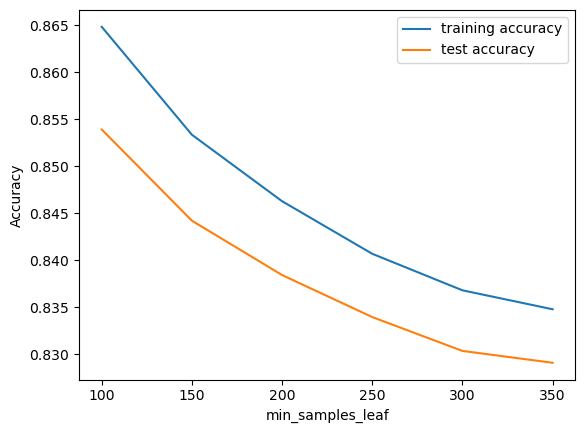

In [175]:
# Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model starts to overfiting with the decrease in value of min_samples_leaf.

In [176]:
## Tuning min_samples_split

In [177]:
# Specifying number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# Instantiating the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fitting tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_PCA, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8670139455334824
{'min_samples_split': 200}


In [178]:
# GridSearch CV scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,75.488403,1.430788,0.178268,0.007687,200,{'min_samples_split': 200},0.855808,0.876200,0.866728,0.871333,0.865000,0.867014,0.006823,1,0.889649,0.889649,0.889386,0.888794,0.888699,0.889235,0.000412
1,73.972663,2.172927,0.243727,0.058123,250,{'min_samples_split': 250},0.850151,0.867517,0.860808,0.865939,0.861974,0.861278,0.006085,2,0.881229,0.879190,0.879190,0.878729,0.879292,0.879526,0.000874
2,75.950228,1.507916,0.243724,0.044847,300,{'min_samples_split': 300},0.841731,0.864228,0.856203,0.861729,0.857763,0.856331,0.007832,3,0.871888,0.872085,0.872151,0.871789,0.872221,0.872027,0.000163
3,74.760702,1.792892,0.181234,0.018745,350,{'min_samples_split': 350},0.838837,0.860018,0.852519,0.856598,0.854737,0.852542,0.007280,4,0.866165,0.867118,0.866066,0.866691,0.867254,0.866659,0.000482
4,67.873338,6.933817,0.163631,0.025813,400,{'min_samples_split': 400},0.837258,0.855677,0.852256,0.854230,0.849868,0.849858,0.006595,5,0.863204,0.862218,0.862218,0.860672,0.861400,0.861942,0.000855


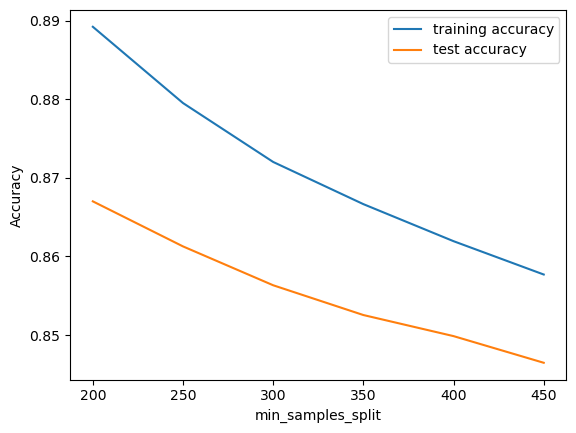

In [179]:
# Plotting Accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [180]:
# Creating the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [181]:
# Fitting the grid search to the data
grid_search.fit(X_train_PCA, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [182]:
# Printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8496737185559415 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [183]:
# Model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             n_estimators =grid_search.best_params_['n_estimators'],
                             random_state=100, oob_score=True)

In [184]:
# Fitting the Model
rfc.fit(X_train_PCA,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=200, oob_score=True,
                       random_state=100)

In [185]:
# Predicting using test data

predictions = rfc.predict(X_test_PCA)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8143
           1       0.38      0.71      0.50       767

    accuracy                           0.88      8910
   macro avg       0.68      0.80      0.71      8910
weighted avg       0.92      0.88      0.89      8910



In [186]:
rfc.oob_score_

0.8658299126407747

The OOB score indicates the accuracy of our model, which we calculated using the training dataset. Next, we will examine the predictions and other performance metrics.

In [187]:
#Creating confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)
# Checking Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, predictions),2))

#Checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#Checking specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# Checking the area under curve
y_pred_prob = rfc.predict_proba(X_test_PCA)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[7255  888]
 [ 221  546]]
Accuracy:- 0.88
sensitivity 	 0.71
specificity 	 0.89
AUC:    	 0.88


Model summary (Random Forest with PCA)

Accuracy = 0.88
Sensitivity = 0.71
Specificity = 0.89
AUC Score = 0.88

#### Modelling without PCA

In [188]:
# Logistic Regression without PCA

In [189]:
import statsmodels.api as sm

In [210]:
# Instantiating the model and also Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [211]:
# Fitting the model
log_no_pca = log_no_pca.fit().summary()

In [212]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37869
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Oct 2024   Deviance:                       27114.
Time:                        10:59:54   Pearson chi2:                 2.73e+05
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3492      0.060      5.821      0.000       0.232       0.467
arpu_6                              0.2757      0.059      4.664      0.000       0.160       0.392
arpu_7                              0.1041      0.062      1.680      0.093      -0.017       0.226
arpu_8                              0.6622      0.078      8.484      0.000       0.509       0.815
onnet_mou_6                         9.1109      2.409      3.783      0.000       4.390      13.832
onnet_mou_7                        -5.3742      1.492     -3.603      0.000      -8.298      -2.450
onnet_mou_8                         2.2175      1.149      1.930      0.054      -0.034       4.469
offnet_mou_6                        9.6843      2.367      4.091      0.000       5.044      14.324
offnet_mou_7                       -5.6841      1.505     -3.776      0.000      -8.634      -2.734
offnet_mou_8                        1.0968      1.158      0.947      0.344      -1.173       3.366
roam_ic_mou_6                       0.1195      0.032      3.744      0.000       0.057       0.182
roam_ic_mou_7                      -0.0162      0.029     -0.559      0.576      -0.073       0.041
roam_ic_mou_8                       0.0156      0.027      0.575      0.566      -0.038       0.069
roam_og_mou_6                      -2.5257      0.613     -4.121      0.000      -3.727      -1.325
roam_og_mou_7                       1.4099      0.328      4.297      0.000       0.767       2.053
roam_og_mou_8                      -0.3801      0.296     -1.286      0.198      -0.959       0.199
loc_og_t2t_mou_6                 2175.3980    671.593      3.239      0.001     859.100    3491.696
loc_og_t2t_mou_7                  210.0031    645.924      0.325      0.745   -1055.985    1475.992
loc_og_t2t_mou_8                 7008.2804    589.922     11.880      0.000    5852.055    8164.506
loc_og_t2m_mou_6                 2167.0854    669.189      3.238      0.001     855.500    3478.671
loc_og_t2m_mou_7                  204.1833    628.220      0.325      0.745   -1027.105    1435.471
loc_og_t2m_mou_8                 7253.0171    610.470     11.881      0.000    6056.519    8449.516
loc_og_t2f_mou_6                  160.3517     49.506      3.239      0.001      63.322     257.381
loc_og_t2f_mou_7                   15.8066     49.221      0.321      0.748     -80.664     112.277
loc_og_t2f_mou_8                  567.9886     47.796     11.884      0.000     474.310     661.668
loc_og_t2c_mou_6                   -0.0338      0.022     -1.535      0.125      -0.077       0.009
loc_og_t2c_mou_7                    0.1622      0.027      6.038      0.000       0.110       0.215
loc_og_t2c_mou_8                   -0.0468      0.019     -2.456      0.014      -0

As we see there are many features with high p-values and hence those features are insignificant for our model.
Also, there are few features with negative coefficients as well.

In [193]:
# Tuning the parameters

First, we will select some features using RFE. Then, we will manually eliminate the remaining features based on p-values and VIF until we achieve the best model.

In [213]:
## Feature selection using RFE

# Intantiating the logistic regression
Log_reg = LogisticRegression()

In [195]:
# Using RFE with 15 columns/features

In [214]:
# Importing RFE
from sklearn.feature_selection import RFE

In [215]:
# Intantiating RFE with 15 columns
rfe = RFE(Log_reg, n_features_to_select=15)

In [216]:
# Fitting the rfe model with train set
rfe = rfe.fit(X_train,y_train)

In [217]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action',
       'dec_MOU_action'],
      dtype='object')


#### Model-1

In [218]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiating the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fitting the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37988
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Oct 2024   Deviance:                       30904.
Time:                        11:01:04   Pearson chi2:                 6.29e+06
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2337      0.049      4.769      0.000       0.138       0.330
arpu_6                 0.5824      0.021     28.274      0.000       0.542       0.623
offnet_mou_8          -1.3046      0.073    -17.945      0.000      -1.447      -1.162
roam_og_mou_8          0.3722      0.020     18.567      0.000       0.333       0.411
std_og_t2m_mou_8       1.1290      0.063     17.873      0.000       1.005       1.253
og_others_8           -7.0824      3.242     -2.185      0.029     -13.436      -0.729
total_og_mou_8        -0.5166      0.028    -18.361      0.000      -0.572      -0.461
loc_ic_t2m_mou_7       0.9430      0.040     23.708      0.000       0.865       1.021
loc_ic_t2m_mou_8      -1.2008      0.093    -12.972      0.000      -1.382      -1.019
loc_ic_mou_8          -0.4502      0.095     -4.716      0.000      -0.637      -0.263
total_ic_mou_8        -0.7558      0.062    -12.154      0.000      -0.878      -0.634
total_rech_num_8      -0.5814      0.022    -26.472      0.000      -0.624      -0.538
last_day_rch_amt_8    -0.5823      0.022    -26.078      0.000      -0.626      -0.539
max_rech_data_8       -0.6742      0.021    -32.341      0.000      -0.715      -0.633
dec_rech_action       -0.7016      0.036    -19.511      0.000      -0.772      -0.631
dec_MOU_action        -0.5053      0.035    -14.247      0.000      -0.575      -0.436
======================================================================================
"""

In [201]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# FUNCTION FOR VIF calculation

def VIF_CALC(df):
    vif=pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [202]:
VIF_CALC(X_train[rfe_cols])

,Features,VIF
8,loc_ic_mou_8,8.71
1,offnet_mou_8,7.83
3,std_og_t2m_mou_8,5.85
7,loc_ic_t2m_mou_8,5.81
9,total_ic_mou_8,5.70
5,total_og_mou_8,2.92
13,dec_rech_action,2.63
14,dec_MOU_action,2.61
6,loc_ic_t2m_mou_7,2.29
10,total_rech_num_8,1.49


In [219]:
# Removing loc_ic_mou_8 column because of its high VIF value.
log_cols = rfe_cols.to_list()
log_cols.remove('loc_ic_mou_8')
print(log_cols)

['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action', 'dec_MOU_action']


#### Model-2

In [220]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37989
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Oct 2024   Deviance:                       30927.
Time:                        11:03:41   Pearson chi2:                 6.85e+06
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2399      0.049      4.909      0.000       0.144       0.336
arpu_6                 0.5847      0.021     28.379      0.000       0.544       0.625
offnet_mou_8          -1.3123      0.073    -18.014      0.000      -1.455      -1.169
roam_og_mou_8          0.3750      0.020     18.691      0.000       0.336       0.414
std_og_t2m_mou_8       1.1476      0.063     18.171      0.000       1.024       1.271
og_others_8           -7.0606      3.231     -2.185      0.029     -13.393      -0.728
total_og_mou_8        -0.5246      0.028    -18.659      0.000      -0.580      -0.470
loc_ic_t2m_mou_7       0.9332      0.039     23.638      0.000       0.856       1.011
loc_ic_t2m_mou_8      -1.4386      0.076    -18.934      0.000      -1.588      -1.290
total_ic_mou_8        -0.9510      0.051    -18.753      0.000      -1.050      -0.852
total_rech_num_8      -0.5790      0.022    -26.378      0.000      -0.622      -0.536
last_day_rch_amt_8    -0.5845      0.022    -26.134      0.000      -0.628      -0.541
max_rech_data_8       -0.6753      0.021    -32.393      0.000      -0.716      -0.634
dec_rech_action       -0.7031      0.036    -19.564      0.000      -0.774      -0.633
dec_MOU_action        -0.5071      0.035    -14.307      0.000      -0.577      -0.438
======================================================================================
"""

In [221]:
# Checking VIF of Model-2

VIF_CALC(X_train[log_cols])

,Features,VIF
1,offnet_mou_8,7.82
3,std_og_t2m_mou_8,5.81
7,loc_ic_t2m_mou_8,4.42
8,total_ic_mou_8,2.94
5,total_og_mou_8,2.91
12,dec_rech_action,2.63
13,dec_MOU_action,2.61
6,loc_ic_t2m_mou_7,2.28
9,total_rech_num_8,1.49
10,last_day_rch_amt_8,1.25


In [222]:
# Removing offnet_mou_8 column 
log_cols.remove('offnet_mou_8')
print(log_cols)

['arpu_6', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action', 'dec_MOU_action']


#### Model-3

In [223]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37990
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Oct 2024   Deviance:                       31305.
Time:                        11:05:00   Pearson chi2:                 1.24e+07
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2137      0.050      4.286      0.000       0.116       0.311
arpu_6                 0.5595      0.020     27.688      0.000       0.520       0.599
roam_og_mou_8          0.1733      0.016     10.774      0.000       0.142       0.205
std_og_t2m_mou_8       0.1052      0.023      4.650      0.000       0.061       0.150
og_others_8           -7.3458      3.356     -2.189      0.029     -13.923      -0.769
total_og_mou_8        -0.6318      0.029    -22.148      0.000      -0.688      -0.576
loc_ic_t2m_mou_7       0.9694      0.040     24.189      0.000       0.891       1.048
loc_ic_t2m_mou_8      -1.9528      0.073    -26.837      0.000      -2.095      -1.810
total_ic_mou_8        -0.9642      0.051    -18.810      0.000      -1.065      -0.864
total_rech_num_8      -0.5723      0.022    -26.247      0.000      -0.615      -0.530
last_day_rch_amt_8    -0.6205      0.022    -27.921      0.000      -0.664      -0.577
max_rech_data_8       -0.6772      0.021    -32.651      0.000      -0.718      -0.637
dec_rech_action       -0.6808      0.036    -19.101      0.000      -0.751      -0.611
dec_MOU_action        -0.4939      0.035    -14.041      0.000      -0.563      -0.425
======================================================================================
"""

In [224]:
VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_t2m_mou_8,4.13
7,total_ic_mou_8,2.94
11,dec_rech_action,2.63
12,dec_MOU_action,2.61
4,total_og_mou_8,2.52
5,loc_ic_t2m_mou_7,2.28
2,std_og_t2m_mou_8,1.85
8,total_rech_num_8,1.49
9,last_day_rch_amt_8,1.23
10,max_rech_data_8,1.13


#### Model-4

In [225]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37990
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Oct 2024   Deviance:                       31305.
Time:                        11:05:14   Pearson chi2:                 1.24e+07
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2137      0.050      4.286      0.000       0.116       0.311
arpu_6                 0.5595      0.020     27.688      0.000       0.520       0.599
roam_og_mou_8          0.1733      0.016     10.774      0.000       0.142       0.205
std_og_t2m_mou_8       0.1052      0.023      4.650      0.000       0.061       0.150
og_others_8           -7.3458      3.356     -2.189      0.029     -13.923      -0.769
total_og_mou_8        -0.6318      0.029    -22.148      0.000      -0.688      -0.576
loc_ic_t2m_mou_7       0.9694      0.040     24.189      0.000       0.891       1.048
loc_ic_t2m_mou_8      -1.9528      0.073    -26.837      0.000      -2.095      -1.810
total_ic_mou_8        -0.9642      0.051    -18.810      0.000      -1.065      -0.864
total_rech_num_8      -0.5723      0.022    -26.247      0.000      -0.615      -0.530
last_day_rch_amt_8    -0.6205      0.022    -27.921      0.000      -0.664      -0.577
max_rech_data_8       -0.6772      0.021    -32.651      0.000      -0.718      -0.637
dec_rech_action       -0.6808      0.036    -19.101      0.000      -0.751      -0.611
dec_MOU_action        -0.4939      0.035    -14.041      0.000      -0.563      -0.425
======================================================================================
"""

In [226]:
VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_t2m_mou_8,4.13
7,total_ic_mou_8,2.94
11,dec_rech_action,2.63
12,dec_MOU_action,2.61
4,total_og_mou_8,2.52
5,loc_ic_t2m_mou_7,2.28
2,std_og_t2m_mou_8,1.85
8,total_rech_num_8,1.49
9,last_day_rch_amt_8,1.23
10,max_rech_data_8,1.13


#### Model-5

In [227]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiating the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fitting the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37990
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Oct 2024   Deviance:                       31305.
Time:                        11:05:24   Pearson chi2:                 1.24e+07
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2137      0.050      4.286      0.000       0.116       0.311
arpu_6                 0.5595      0.020     27.688      0.000       0.520       0.599
roam_og_mou_8          0.1733      0.016     10.774      0.000       0.142       0.205
std_og_t2m_mou_8       0.1052      0.023      4.650      0.000       0.061       0.150
og_others_8           -7.3458      3.356     -2.189      0.029     -13.923      -0.769
total_og_mou_8        -0.6318      0.029    -22.148      0.000      -0.688      -0.576
loc_ic_t2m_mou_7       0.9694      0.040     24.189      0.000       0.891       1.048
loc_ic_t2m_mou_8      -1.9528      0.073    -26.837      0.000      -2.095      -1.810
total_ic_mou_8        -0.9642      0.051    -18.810      0.000      -1.065      -0.864
total_rech_num_8      -0.5723      0.022    -26.247      0.000      -0.615      -0.530
last_day_rch_amt_8    -0.6205      0.022    -27.921      0.000      -0.664      -0.577
max_rech_data_8       -0.6772      0.021    -32.651      0.000      -0.718      -0.637
dec_rech_action       -0.6808      0.036    -19.101      0.000      -0.751      -0.611
dec_MOU_action        -0.4939      0.035    -14.041      0.000      -0.563      -0.425
======================================================================================
"""

In [228]:
VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_t2m_mou_8,4.13
7,total_ic_mou_8,2.94
11,dec_rech_action,2.63
12,dec_MOU_action,2.61
4,total_og_mou_8,2.52
5,loc_ic_t2m_mou_7,2.28
2,std_og_t2m_mou_8,1.85
8,total_rech_num_8,1.49
9,last_day_rch_amt_8,1.23
10,max_rech_data_8,1.13


#### Model-6

In [229]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37990
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Oct 2024   Deviance:                       31305.
Time:                        11:05:31   Pearson chi2:                 1.24e+07
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2137      0.050      4.286      0.000       0.116       0.311
arpu_6                 0.5595      0.020     27.688      0.000       0.520       0.599
roam_og_mou_8          0.1733      0.016     10.774      0.000       0.142       0.205
std_og_t2m_mou_8       0.1052      0.023      4.650      0.000       0.061       0.150
og_others_8           -7.3458      3.356     -2.189      0.029     -13.923      -0.769
total_og_mou_8        -0.6318      0.029    -22.148      0.000      -0.688      -0.576
loc_ic_t2m_mou_7       0.9694      0.040     24.189      0.000       0.891       1.048
loc_ic_t2m_mou_8      -1.9528      0.073    -26.837      0.000      -2.095      -1.810
total_ic_mou_8        -0.9642      0.051    -18.810      0.000      -1.065      -0.864
total_rech_num_8      -0.5723      0.022    -26.247      0.000      -0.615      -0.530
last_day_rch_amt_8    -0.6205      0.022    -27.921      0.000      -0.664      -0.577
max_rech_data_8       -0.6772      0.021    -32.651      0.000      -0.718      -0.637
dec_rech_action       -0.6808      0.036    -19.101      0.000      -0.751      -0.611
dec_MOU_action        -0.4939      0.035    -14.041      0.000      -0.563      -0.425
======================================================================================
"""

In [230]:
VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_t2m_mou_8,4.13
7,total_ic_mou_8,2.94
11,dec_rech_action,2.63
12,dec_MOU_action,2.61
4,total_og_mou_8,2.52
5,loc_ic_t2m_mou_7,2.28
2,std_og_t2m_mou_8,1.85
8,total_rech_num_8,1.49
9,last_day_rch_amt_8,1.23
10,max_rech_data_8,1.13


Insights: The p-values are in the Acceptable Range i.e the VIF's of all the values below 5 which is considered as good and acceptable range

In [ ]:
## Model performance on the train set

In [231]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_6.predict(X_train_sm_6)
y_train_pred_no_pca.head()

0    0.024127
1    0.110401
2    0.116236
3    0.039593
4    0.568756
dtype: float64

In [232]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.024127,0
1,0,0.110401,1
2,0,0.116236,2
3,0,0.039593,3
4,0,0.568756,4


In [ ]:
## Findind the Optimal Probability cutoff points

In [233]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024127,0,1,0,0,0,0,0,0,0,0,0
1,0,0.110401,1,1,1,0,0,0,0,0,0,0,0
2,0,0.116236,2,1,1,0,0,0,0,0,0,0,0
3,0,0.039593,3,1,0,0,0,0,0,0,0,0,0
4,0,0.568756,4,1,1,1,1,1,1,0,0,0,0


In [ ]:
## Calculating accuracy, sensitivity and specificity for various probability cutoffs.

In [234]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500026     1.000000     0.000053
0.1          0.1  0.678929     0.970108     0.387749
0.2          0.2  0.741185     0.949005     0.533365
0.3          0.3  0.785970     0.925692     0.646248
0.4          0.4  0.813441     0.890643     0.736238
0.5          0.5  0.832018     0.851805     0.812230
0.6          0.6  0.834412     0.797758     0.871066
0.7          0.7  0.825571     0.733081     0.918061
0.8          0.8  0.773261     0.593832     0.952689
0.9          0.9  0.604015     0.221135     0.986896


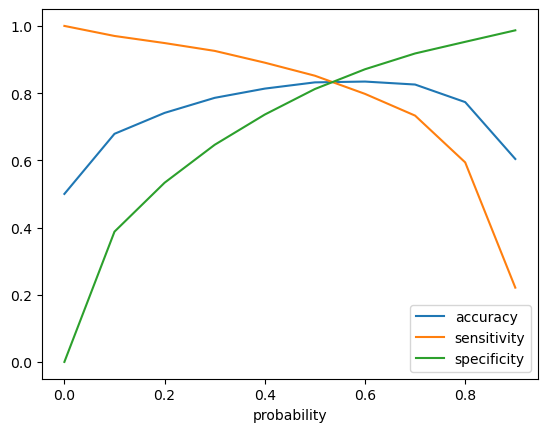

In [235]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

Accuracy - Becomes stable around 0.6 approx

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

Hence we consider cutoff point to be 0.6

In [236]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.024127,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.110401,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.116236,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.039593,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.568756,4,1,1,1,1,1,1,0,0,0,0,0


In [ ]:
## Evaluation matrics

In [237]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16552  2450]
 [ 3843 15159]]


In [238]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [239]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-",round( TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

Accuracy:- 0.83
Sensitivity:- 0.8
Specificity:- 0.87
Recall:- 0.8


Insight: Got good accuracy, sensitivity and specificity on the train set prediction.

In [240]:
# Plotting the ROC curve.

# ROC Curve function

def PLOT_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

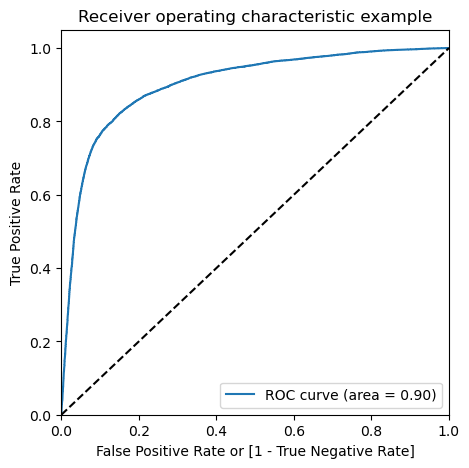

In [241]:
PLOT_ROC(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

Insight: The curve we are getting has good AUC value of 0.89, indicates that we have a good predictive model.

In [ ]:
## Model Performance on the test set

In [242]:
# Taking a copy of the test set
X_test_log = X_test.copy()

# Taking columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [243]:
# Predicting on the test set using the FINAL MODEL i.e MODEL-2
y_test_pred = log_no_pca_6.predict(X_test_sm)

y_test_pred.head()

2722     0.359237
28720    0.019547
43175    0.176703
50024    0.969500
37809    0.078230
dtype: float64

In [244]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2722,0.359237
28720,0.019547
43175,0.176703
50024,0.969500
37809,0.078230


In [245]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
2722,0
28720,0
43175,0
50024,1
37809,0


In [246]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [247]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [248]:
# Concatinating y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_test_pred_final.head()

,churn,CustID,0
0,0,2722,0.359237
1,0,28720,0.019547
2,0,43175,0.176703
3,1,50024,0.969500
4,0,37809,0.078230


In [249]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})
y_test_pred_final.head()

,churn,CustID,churn_prob
0,0,2722,0.359237
1,0,28720,0.019547
2,0,43175,0.176703
3,1,50024,0.969500
4,0,37809,0.078230


In [250]:
# Using optimal probablity cutoff 0.6, that we considered previously in the test set. 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,2722,0.359237,0
1,0,28720,0.019547,0
2,0,43175,0.176703,0
3,1,50024,0.969500,1
4,0,37809,0.078230,0


In [ ]:
## Evaluation Matrix

In [252]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[7146  997]
 [ 177  590]]


In [253]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

Accuracy:- 0.87
Sensitivity:- 0.8
Specificity:- 0.87
Recall:- 0.8


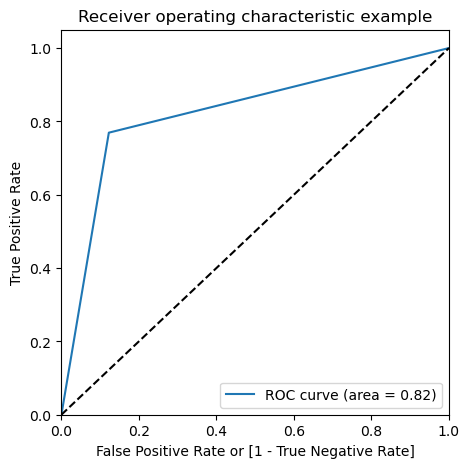

In [254]:
PLOT_ROC(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])

Insight: From the above ROC plot we get AUC of 0.76.

In [ ]:
Model summary (Logistic Regression Without PCA)

Train set
Accuracy = 0.83
Sensitivity = 0.8
Specificity = 0.87
Recall = 0.8
Test set
Accuracy = 0.87
Sensitivity = 0.8
Specificity = 0.87
Recall = 0.8

In [255]:
model_stats = pd.DataFrame(
    {'model':['Logistic Regression with PCA','Decision Tree with PCA','Random Forest with PCA','Logistic without PCA'],
                      
    'Recall':       [0.87,0.89,0.70,0.82],
    'Test accuracy':     [0.83,0.83,0.87,0.79],
    'Roc_auc_score':[0.88,0.77,0.88,0.76],
    })

model_stats.sort_values(by=['Recall','Test accuracy','Roc_auc_score'],ascending=False)

,model,Recall,Test accuracy,Roc_auc_score
1,Decision Tree with PCA,0.89,0.83,0.77
0,Logistic Regression with PCA,0.87,0.83,0.88
3,Logistic without PCA,0.82,0.79,0.76
2,Random Forest with PCA,0.70,0.87,0.88


In [257]:
features = dt_pca_model.feature_importances_
cols =[X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns]
                
cols

[Index(['arpu_8', 'loc_og_t2m_mou_6', 'loc_og_t2t_mou_7', 'roam_ic_mou_7',
        'onnet_mou_7', 'onnet_mou_8', 'loc_og_t2c_mou_7', 'arpu_7',
        'roam_og_mou_8', 'arpu_6'],
       dtype='object')]

In [258]:
Imp_Features=pd.DataFrame({'FEATURES':['loc_og_t2m_mou_7', 'total_og_mou_6', 'loc_og_t2t_mou_7',
        'roam_ic_mou_7', 'onnet_mou_7', 'arpu_7', 'loc_og_t2c_mou_7',
        'onnet_mou_8', 'roam_og_mou_8', 'arpu_6']})
Imp_Features

,FEATURES
0,loc_og_t2m_mou_7
1,total_og_mou_6
2,loc_og_t2t_mou_7
3,roam_ic_mou_7
4,onnet_mou_7
5,arpu_7
6,loc_og_t2c_mou_7
7,onnet_mou_8
8,roam_og_mou_8
9,arpu_6


### Conclusion

1. During the exploratory data analysis (EDA), we identified a significant decline in recharge amounts, call usage, and data consumption in the 8th month, referred to as the Action Phase. The key features influencing this phase include:
- loc_og_t2m_mou_7
- total_og_mou_6
- loc_og_t2t_mou_7
- roam_ic_mou_7
- onnet_mou_7
- arpu_7
- loc_og_t2c_mou_7
- onnet_mou_8
- roam_og_mou_8
- arpu_6

2. The Average Revenue Per User (ARPU) in the 7th month is critical in predicting customer churn. A sudden drop in ARPU may indicate that a customer is considering leaving, and timely actions should be taken to retain them.

3. Local outgoing minutes of usage are one of the most influential factors impacting customer churn.

4. Roaming minutes of usage (both incoming and outgoing) also significantly affect customer churn.

5. Additionally, the total outgoing minutes of usage is another key factor contributing to churn.

### Strategies

Here are some strategies that can be implemented to reduce customer churn:

1. A sudden decline in local minutes of usage might signal dissatisfaction due to poor customer service, network issues, or unsuitable plans. Focusing on enhancing network quality and improving customer service could help retain these customers.

2. Routine feedback calls should be conducted based on factors such as usage patterns, recent recharges, and onnet usage. These calls can help understand customer grievances and expectations, allowing for timely intervention to prevent churn.

3. Offering attractive deals and promotions to customers who exhibit a sudden drop in spending on calls and data recharges during the action phase can entice them to stay.

4. Providing customized plans tailored to the needs of customers who show signs of potential churn can help retain them by offering better value or more suitable options.

5. Promotional offers targeting customers who display reduced engagement can serve as an effective tool in reducing churn.
